In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")
    

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


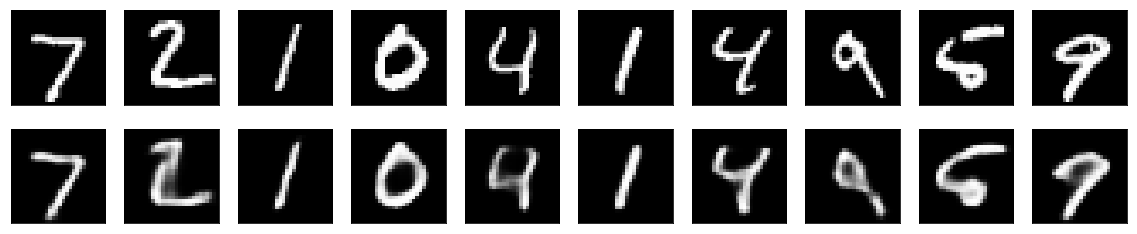

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
data_x = encoder.predict(x_train)
print(data_x.shape)

(60000, 4, 4, 4)


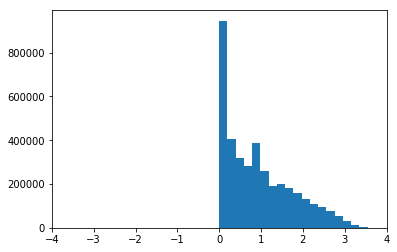

In [5]:
plt.xlim(-4, 4)
plt.hist(data_x.reshape(60000 * 64), normed=False, bins=20)
plt.show()

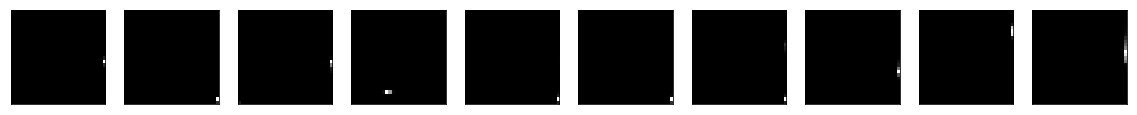

0 [D loss: 0.949898, acc.: 50.00%] [G loss: 0.548757]
1 [D loss: 0.742871, acc.: 50.00%] [G loss: 0.792999]
2 [D loss: 0.606226, acc.: 50.00%] [G loss: 1.013453]
3 [D loss: 0.525397, acc.: 92.19%] [G loss: 1.195796]
4 [D loss: 0.459579, acc.: 98.44%] [G loss: 1.356532]
5 [D loss: 0.423034, acc.: 100.00%] [G loss: 1.448479]
6 [D loss: 0.401200, acc.: 100.00%] [G loss: 1.518836]
7 [D loss: 0.381011, acc.: 100.00%] [G loss: 1.577247]
8 [D loss: 0.380461, acc.: 99.22%] [G loss: 1.616222]
9 [D loss: 0.402941, acc.: 96.88%] [G loss: 1.653871]
10 [D loss: 0.420418, acc.: 96.88%] [G loss: 1.656208]
11 [D loss: 0.489639, acc.: 83.59%] [G loss: 1.549025]
12 [D loss: 0.570165, acc.: 70.31%] [G loss: 1.569698]
13 [D loss: 0.684639, acc.: 53.12%] [G loss: 1.524736]
14 [D loss: 0.731407, acc.: 47.66%] [G loss: 1.506794]
15 [D loss: 0.746637, acc.: 44.53%] [G loss: 1.549602]
16 [D loss: 0.739990, acc.: 42.19%] [G loss: 1.589463]
17 [D loss: 0.724545, acc.: 40.62%] [G loss: 1.612211]
18 [D loss: 0.755

151 [D loss: 0.686069, acc.: 42.19%] [G loss: 0.763579]
152 [D loss: 0.670576, acc.: 46.09%] [G loss: 0.756895]
153 [D loss: 0.673458, acc.: 45.31%] [G loss: 0.750668]
154 [D loss: 0.684034, acc.: 42.19%] [G loss: 0.743104]
155 [D loss: 0.631145, acc.: 48.44%] [G loss: 0.763613]
156 [D loss: 0.640091, acc.: 44.53%] [G loss: 0.783253]
157 [D loss: 0.652031, acc.: 48.44%] [G loss: 0.778859]
158 [D loss: 0.657751, acc.: 48.44%] [G loss: 0.784110]
159 [D loss: 0.667647, acc.: 44.53%] [G loss: 0.783855]
160 [D loss: 0.660414, acc.: 42.97%] [G loss: 0.783786]
161 [D loss: 0.655604, acc.: 44.53%] [G loss: 0.791023]
162 [D loss: 0.665978, acc.: 46.88%] [G loss: 0.776627]
163 [D loss: 0.699471, acc.: 42.97%] [G loss: 0.781334]
164 [D loss: 0.701221, acc.: 39.06%] [G loss: 0.783658]
165 [D loss: 0.684181, acc.: 42.19%] [G loss: 0.779947]
166 [D loss: 0.681826, acc.: 42.19%] [G loss: 0.783697]
167 [D loss: 0.668922, acc.: 49.22%] [G loss: 0.789726]
168 [D loss: 0.664397, acc.: 46.09%] [G loss: 0.

303 [D loss: 0.675394, acc.: 59.38%] [G loss: 0.791760]
304 [D loss: 0.678136, acc.: 57.03%] [G loss: 0.789093]
305 [D loss: 0.680216, acc.: 60.16%] [G loss: 0.791997]
306 [D loss: 0.676266, acc.: 57.81%] [G loss: 0.800284]
307 [D loss: 0.682536, acc.: 60.16%] [G loss: 0.786064]
308 [D loss: 0.681974, acc.: 57.81%] [G loss: 0.784183]
309 [D loss: 0.671531, acc.: 65.62%] [G loss: 0.782139]
310 [D loss: 0.684069, acc.: 54.69%] [G loss: 0.769413]
311 [D loss: 0.678013, acc.: 57.03%] [G loss: 0.770274]
312 [D loss: 0.695053, acc.: 53.91%] [G loss: 0.777752]
313 [D loss: 0.698865, acc.: 47.66%] [G loss: 0.774862]
314 [D loss: 0.698289, acc.: 50.78%] [G loss: 0.771778]
315 [D loss: 0.695702, acc.: 46.88%] [G loss: 0.775736]
316 [D loss: 0.671300, acc.: 60.16%] [G loss: 0.766561]
317 [D loss: 0.686935, acc.: 49.22%] [G loss: 0.776217]
318 [D loss: 0.685731, acc.: 54.69%] [G loss: 0.780684]
319 [D loss: 0.679285, acc.: 58.59%] [G loss: 0.780536]
320 [D loss: 0.678530, acc.: 62.50%] [G loss: 0.

454 [D loss: 0.687151, acc.: 60.16%] [G loss: 0.765254]
455 [D loss: 0.686547, acc.: 56.25%] [G loss: 0.759826]
456 [D loss: 0.690077, acc.: 55.47%] [G loss: 0.770828]
457 [D loss: 0.684708, acc.: 55.47%] [G loss: 0.767782]
458 [D loss: 0.685013, acc.: 62.50%] [G loss: 0.766286]
459 [D loss: 0.682339, acc.: 59.38%] [G loss: 0.767493]
460 [D loss: 0.681944, acc.: 57.81%] [G loss: 0.754656]
461 [D loss: 0.683865, acc.: 57.81%] [G loss: 0.758597]
462 [D loss: 0.686843, acc.: 54.69%] [G loss: 0.751752]
463 [D loss: 0.689272, acc.: 57.03%] [G loss: 0.758964]
464 [D loss: 0.695573, acc.: 44.53%] [G loss: 0.762525]
465 [D loss: 0.692631, acc.: 54.69%] [G loss: 0.763994]
466 [D loss: 0.691089, acc.: 53.91%] [G loss: 0.754239]
467 [D loss: 0.694464, acc.: 46.88%] [G loss: 0.757527]
468 [D loss: 0.693471, acc.: 50.78%] [G loss: 0.751502]
469 [D loss: 0.684134, acc.: 56.25%] [G loss: 0.768305]
470 [D loss: 0.686514, acc.: 53.91%] [G loss: 0.752637]
471 [D loss: 0.691245, acc.: 50.78%] [G loss: 0.

603 [D loss: 0.680493, acc.: 63.28%] [G loss: 0.751604]
604 [D loss: 0.682844, acc.: 54.69%] [G loss: 0.754545]
605 [D loss: 0.685372, acc.: 55.47%] [G loss: 0.760187]
606 [D loss: 0.683266, acc.: 60.94%] [G loss: 0.754531]
607 [D loss: 0.686638, acc.: 59.38%] [G loss: 0.764425]
608 [D loss: 0.672412, acc.: 71.88%] [G loss: 0.764665]
609 [D loss: 0.679261, acc.: 64.84%] [G loss: 0.765670]
610 [D loss: 0.668917, acc.: 71.09%] [G loss: 0.765185]
611 [D loss: 0.673271, acc.: 58.59%] [G loss: 0.757426]
612 [D loss: 0.676166, acc.: 63.28%] [G loss: 0.758935]
613 [D loss: 0.678808, acc.: 61.72%] [G loss: 0.759870]
614 [D loss: 0.682734, acc.: 60.94%] [G loss: 0.771517]
615 [D loss: 0.671764, acc.: 65.62%] [G loss: 0.779348]
616 [D loss: 0.679725, acc.: 59.38%] [G loss: 0.763601]
617 [D loss: 0.682788, acc.: 61.72%] [G loss: 0.765122]
618 [D loss: 0.673657, acc.: 68.75%] [G loss: 0.765781]
619 [D loss: 0.686373, acc.: 54.69%] [G loss: 0.759103]
620 [D loss: 0.678200, acc.: 57.03%] [G loss: 0.

755 [D loss: 0.671769, acc.: 65.62%] [G loss: 0.792292]
756 [D loss: 0.674518, acc.: 64.84%] [G loss: 0.791812]
757 [D loss: 0.676314, acc.: 63.28%] [G loss: 0.768946]
758 [D loss: 0.668388, acc.: 66.41%] [G loss: 0.784833]
759 [D loss: 0.683607, acc.: 63.28%] [G loss: 0.786601]
760 [D loss: 0.678994, acc.: 55.47%] [G loss: 0.767063]
761 [D loss: 0.675235, acc.: 63.28%] [G loss: 0.759890]
762 [D loss: 0.669062, acc.: 64.84%] [G loss: 0.764036]
763 [D loss: 0.672541, acc.: 57.03%] [G loss: 0.761425]
764 [D loss: 0.670420, acc.: 66.41%] [G loss: 0.776631]
765 [D loss: 0.673378, acc.: 59.38%] [G loss: 0.793592]
766 [D loss: 0.670409, acc.: 61.72%] [G loss: 0.798005]
767 [D loss: 0.675674, acc.: 60.16%] [G loss: 0.789966]
768 [D loss: 0.670500, acc.: 62.50%] [G loss: 0.797805]
769 [D loss: 0.676398, acc.: 60.94%] [G loss: 0.795561]
770 [D loss: 0.679472, acc.: 57.03%] [G loss: 0.788696]
771 [D loss: 0.673838, acc.: 64.84%] [G loss: 0.785764]
772 [D loss: 0.664292, acc.: 65.62%] [G loss: 0.

904 [D loss: 0.609485, acc.: 75.78%] [G loss: 1.242170]
905 [D loss: 0.659101, acc.: 62.50%] [G loss: 1.072818]
906 [D loss: 0.607196, acc.: 78.12%] [G loss: 1.171004]
907 [D loss: 0.647462, acc.: 65.62%] [G loss: 1.073062]
908 [D loss: 0.608976, acc.: 71.88%] [G loss: 1.121170]
909 [D loss: 0.625839, acc.: 67.97%] [G loss: 0.964276]
910 [D loss: 0.595972, acc.: 77.34%] [G loss: 1.199360]
911 [D loss: 0.623956, acc.: 67.97%] [G loss: 1.160001]
912 [D loss: 0.599004, acc.: 68.75%] [G loss: 1.204950]
913 [D loss: 0.626314, acc.: 71.88%] [G loss: 1.089438]
914 [D loss: 0.590050, acc.: 79.69%] [G loss: 1.357769]
915 [D loss: 0.630897, acc.: 67.19%] [G loss: 1.284110]
916 [D loss: 0.607869, acc.: 71.88%] [G loss: 1.320132]
917 [D loss: 0.562464, acc.: 81.25%] [G loss: 1.287201]
918 [D loss: 0.566574, acc.: 82.81%] [G loss: 1.481860]
919 [D loss: 0.586511, acc.: 77.34%] [G loss: 1.461155]
920 [D loss: 0.540520, acc.: 81.25%] [G loss: 1.608638]
921 [D loss: 0.584490, acc.: 71.88%] [G loss: 1.

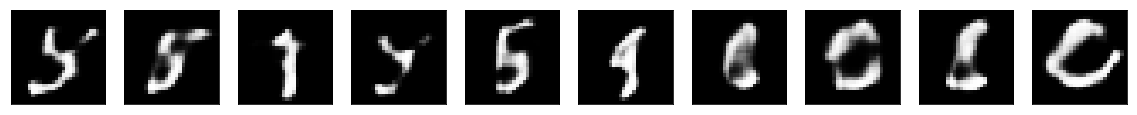

1000 [D loss: 0.497199, acc.: 75.78%] [G loss: 3.534112]
1001 [D loss: 0.621056, acc.: 67.19%] [G loss: 3.548877]
1002 [D loss: 0.566142, acc.: 66.41%] [G loss: 3.931447]
1003 [D loss: 0.491574, acc.: 78.91%] [G loss: 3.652778]
1004 [D loss: 0.527804, acc.: 78.91%] [G loss: 3.720889]
1005 [D loss: 0.531383, acc.: 71.88%] [G loss: 3.730648]
1006 [D loss: 0.495049, acc.: 77.34%] [G loss: 3.654935]
1007 [D loss: 0.538700, acc.: 71.88%] [G loss: 3.062267]
1008 [D loss: 0.441027, acc.: 82.03%] [G loss: 3.681655]
1009 [D loss: 0.532415, acc.: 76.56%] [G loss: 3.628743]
1010 [D loss: 0.496114, acc.: 75.00%] [G loss: 3.641514]
1011 [D loss: 0.567161, acc.: 68.75%] [G loss: 3.109821]
1012 [D loss: 0.483176, acc.: 78.91%] [G loss: 3.544853]
1013 [D loss: 0.483091, acc.: 78.12%] [G loss: 2.672732]
1014 [D loss: 0.505603, acc.: 75.00%] [G loss: 3.247584]
1015 [D loss: 0.540964, acc.: 71.09%] [G loss: 3.084531]
1016 [D loss: 0.475807, acc.: 82.81%] [G loss: 3.395634]
1017 [D loss: 0.543246, acc.: 7

1149 [D loss: 0.627871, acc.: 65.62%] [G loss: 1.246549]
1150 [D loss: 0.565408, acc.: 75.78%] [G loss: 1.307705]
1151 [D loss: 0.614321, acc.: 72.66%] [G loss: 1.365728]
1152 [D loss: 0.608723, acc.: 68.75%] [G loss: 1.440048]
1153 [D loss: 0.636492, acc.: 62.50%] [G loss: 1.327809]
1154 [D loss: 0.571642, acc.: 76.56%] [G loss: 1.413492]
1155 [D loss: 0.605801, acc.: 71.88%] [G loss: 1.079139]
1156 [D loss: 0.584782, acc.: 71.88%] [G loss: 1.224172]
1157 [D loss: 0.601851, acc.: 67.19%] [G loss: 1.482354]
1158 [D loss: 0.600083, acc.: 67.97%] [G loss: 1.766563]
1159 [D loss: 0.639238, acc.: 60.16%] [G loss: 1.188792]
1160 [D loss: 0.593305, acc.: 69.53%] [G loss: 1.184315]
1161 [D loss: 0.579972, acc.: 72.66%] [G loss: 1.073570]
1162 [D loss: 0.634136, acc.: 64.84%] [G loss: 1.109666]
1163 [D loss: 0.608902, acc.: 69.53%] [G loss: 1.354334]
1164 [D loss: 0.566884, acc.: 78.12%] [G loss: 1.588763]
1165 [D loss: 0.633373, acc.: 64.06%] [G loss: 1.463405]
1166 [D loss: 0.563049, acc.: 7

1300 [D loss: 0.623618, acc.: 71.88%] [G loss: 1.065539]
1301 [D loss: 0.627326, acc.: 70.31%] [G loss: 1.087272]
1302 [D loss: 0.611286, acc.: 72.66%] [G loss: 1.169589]
1303 [D loss: 0.629108, acc.: 64.06%] [G loss: 1.110032]
1304 [D loss: 0.608392, acc.: 68.75%] [G loss: 1.366136]
1305 [D loss: 0.660994, acc.: 60.16%] [G loss: 1.102345]
1306 [D loss: 0.641191, acc.: 62.50%] [G loss: 1.084701]
1307 [D loss: 0.641748, acc.: 67.97%] [G loss: 0.922896]
1308 [D loss: 0.645859, acc.: 61.72%] [G loss: 0.961539]
1309 [D loss: 0.628216, acc.: 74.22%] [G loss: 0.918374]
1310 [D loss: 0.648068, acc.: 60.16%] [G loss: 1.009697]
1311 [D loss: 0.632191, acc.: 67.19%] [G loss: 1.117126]
1312 [D loss: 0.606540, acc.: 69.53%] [G loss: 1.217437]
1313 [D loss: 0.636235, acc.: 64.84%] [G loss: 1.054836]
1314 [D loss: 0.617066, acc.: 73.44%] [G loss: 1.290901]
1315 [D loss: 0.676110, acc.: 53.91%] [G loss: 1.077284]
1316 [D loss: 0.628776, acc.: 67.19%] [G loss: 1.057895]
1317 [D loss: 0.634972, acc.: 6

1444 [D loss: 0.659417, acc.: 61.72%] [G loss: 0.869782]
1445 [D loss: 0.668182, acc.: 59.38%] [G loss: 0.882156]
1446 [D loss: 0.665743, acc.: 59.38%] [G loss: 0.928674]
1447 [D loss: 0.639338, acc.: 64.06%] [G loss: 1.032047]
1448 [D loss: 0.647936, acc.: 64.84%] [G loss: 0.955221]
1449 [D loss: 0.607700, acc.: 72.66%] [G loss: 0.919804]
1450 [D loss: 0.651928, acc.: 63.28%] [G loss: 0.923911]
1451 [D loss: 0.618769, acc.: 75.00%] [G loss: 0.933216]
1452 [D loss: 0.656813, acc.: 62.50%] [G loss: 0.958945]
1453 [D loss: 0.636462, acc.: 63.28%] [G loss: 0.973723]
1454 [D loss: 0.655249, acc.: 57.03%] [G loss: 1.010364]
1455 [D loss: 0.637083, acc.: 65.62%] [G loss: 1.046022]
1456 [D loss: 0.656654, acc.: 57.81%] [G loss: 1.050449]
1457 [D loss: 0.608178, acc.: 73.44%] [G loss: 1.142132]
1458 [D loss: 0.656320, acc.: 58.59%] [G loss: 0.903245]
1459 [D loss: 0.643203, acc.: 64.06%] [G loss: 0.989549]
1460 [D loss: 0.639735, acc.: 63.28%] [G loss: 1.099588]
1461 [D loss: 0.632967, acc.: 5

1594 [D loss: 0.641032, acc.: 64.84%] [G loss: 0.908297]
1595 [D loss: 0.643327, acc.: 64.84%] [G loss: 0.936777]
1596 [D loss: 0.658494, acc.: 53.91%] [G loss: 0.982517]
1597 [D loss: 0.636450, acc.: 65.62%] [G loss: 1.064619]
1598 [D loss: 0.666848, acc.: 56.25%] [G loss: 0.890688]
1599 [D loss: 0.630286, acc.: 66.41%] [G loss: 0.956933]
1600 [D loss: 0.656619, acc.: 59.38%] [G loss: 0.929993]
1601 [D loss: 0.663111, acc.: 59.38%] [G loss: 0.970765]
1602 [D loss: 0.648880, acc.: 64.06%] [G loss: 0.865667]
1603 [D loss: 0.651879, acc.: 63.28%] [G loss: 0.926093]
1604 [D loss: 0.627918, acc.: 67.97%] [G loss: 1.007874]
1605 [D loss: 0.644872, acc.: 60.16%] [G loss: 1.067204]
1606 [D loss: 0.644655, acc.: 70.31%] [G loss: 0.951216]
1607 [D loss: 0.629262, acc.: 67.19%] [G loss: 1.096441]
1608 [D loss: 0.656970, acc.: 57.81%] [G loss: 1.000368]
1609 [D loss: 0.638195, acc.: 64.84%] [G loss: 1.085109]
1610 [D loss: 0.645666, acc.: 60.16%] [G loss: 0.905542]
1611 [D loss: 0.634024, acc.: 6

1740 [D loss: 0.652305, acc.: 57.81%] [G loss: 0.880197]
1741 [D loss: 0.672188, acc.: 55.47%] [G loss: 0.999171]
1742 [D loss: 0.653942, acc.: 61.72%] [G loss: 0.995250]
1743 [D loss: 0.632357, acc.: 69.53%] [G loss: 1.023923]
1744 [D loss: 0.679510, acc.: 60.16%] [G loss: 0.836536]
1745 [D loss: 0.631068, acc.: 71.88%] [G loss: 0.848904]
1746 [D loss: 0.656543, acc.: 64.06%] [G loss: 0.871315]
1747 [D loss: 0.646008, acc.: 67.97%] [G loss: 0.901024]
1748 [D loss: 0.658237, acc.: 62.50%] [G loss: 0.834551]
1749 [D loss: 0.642071, acc.: 71.09%] [G loss: 0.824172]
1750 [D loss: 0.634603, acc.: 68.75%] [G loss: 0.851104]
1751 [D loss: 0.665656, acc.: 64.84%] [G loss: 0.848197]
1752 [D loss: 0.649226, acc.: 63.28%] [G loss: 0.799673]
1753 [D loss: 0.624337, acc.: 73.44%] [G loss: 0.799120]
1754 [D loss: 0.643845, acc.: 67.19%] [G loss: 0.789901]
1755 [D loss: 0.663379, acc.: 64.06%] [G loss: 0.789749]
1756 [D loss: 0.638882, acc.: 69.53%] [G loss: 0.797414]
1757 [D loss: 0.650117, acc.: 6

1884 [D loss: 0.661201, acc.: 58.59%] [G loss: 0.874048]
1885 [D loss: 0.646429, acc.: 60.16%] [G loss: 0.902694]
1886 [D loss: 0.661773, acc.: 55.47%] [G loss: 0.894637]
1887 [D loss: 0.662658, acc.: 60.94%] [G loss: 0.874700]
1888 [D loss: 0.641201, acc.: 66.41%] [G loss: 0.801870]
1889 [D loss: 0.637815, acc.: 65.62%] [G loss: 0.823595]
1890 [D loss: 0.630653, acc.: 63.28%] [G loss: 0.823270]
1891 [D loss: 0.645479, acc.: 63.28%] [G loss: 0.843597]
1892 [D loss: 0.644424, acc.: 63.28%] [G loss: 0.822541]
1893 [D loss: 0.646724, acc.: 65.62%] [G loss: 0.869814]
1894 [D loss: 0.675202, acc.: 53.91%] [G loss: 0.952439]
1895 [D loss: 0.623795, acc.: 64.06%] [G loss: 1.030835]
1896 [D loss: 0.651895, acc.: 60.16%] [G loss: 0.812019]
1897 [D loss: 0.631264, acc.: 70.31%] [G loss: 0.761726]
1898 [D loss: 0.632521, acc.: 69.53%] [G loss: 0.779129]
1899 [D loss: 0.646203, acc.: 64.06%] [G loss: 0.835974]
1900 [D loss: 0.619167, acc.: 65.62%] [G loss: 0.838355]
1901 [D loss: 0.647272, acc.: 5

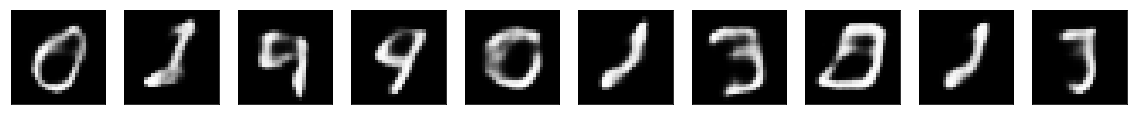

2000 [D loss: 0.633088, acc.: 67.97%] [G loss: 0.839450]
2001 [D loss: 0.612332, acc.: 68.75%] [G loss: 0.824877]
2002 [D loss: 0.635323, acc.: 65.62%] [G loss: 0.794906]
2003 [D loss: 0.653929, acc.: 66.41%] [G loss: 0.794709]
2004 [D loss: 0.632887, acc.: 61.72%] [G loss: 0.832985]
2005 [D loss: 0.634463, acc.: 68.75%] [G loss: 0.834926]
2006 [D loss: 0.628943, acc.: 66.41%] [G loss: 0.828843]
2007 [D loss: 0.653922, acc.: 64.84%] [G loss: 0.826630]
2008 [D loss: 0.656731, acc.: 58.59%] [G loss: 0.826693]
2009 [D loss: 0.670617, acc.: 58.59%] [G loss: 0.869205]
2010 [D loss: 0.636257, acc.: 71.09%] [G loss: 0.937175]
2011 [D loss: 0.641747, acc.: 64.06%] [G loss: 1.022105]
2012 [D loss: 0.665044, acc.: 63.28%] [G loss: 0.838224]
2013 [D loss: 0.603622, acc.: 72.66%] [G loss: 0.888871]
2014 [D loss: 0.617122, acc.: 67.19%] [G loss: 0.837907]
2015 [D loss: 0.634480, acc.: 71.09%] [G loss: 0.847196]
2016 [D loss: 0.653368, acc.: 56.25%] [G loss: 0.837333]
2017 [D loss: 0.627851, acc.: 6

2151 [D loss: 0.628631, acc.: 68.75%] [G loss: 0.789986]
2152 [D loss: 0.638309, acc.: 61.72%] [G loss: 0.777529]
2153 [D loss: 0.611152, acc.: 66.41%] [G loss: 0.831372]
2154 [D loss: 0.634354, acc.: 59.38%] [G loss: 0.842093]
2155 [D loss: 0.641813, acc.: 68.75%] [G loss: 0.957722]
2156 [D loss: 0.662739, acc.: 54.69%] [G loss: 0.872594]
2157 [D loss: 0.620445, acc.: 72.66%] [G loss: 0.956212]
2158 [D loss: 0.676385, acc.: 57.81%] [G loss: 0.829650]
2159 [D loss: 0.652449, acc.: 62.50%] [G loss: 0.865427]
2160 [D loss: 0.613082, acc.: 70.31%] [G loss: 0.830894]
2161 [D loss: 0.683052, acc.: 50.00%] [G loss: 0.822962]
2162 [D loss: 0.632805, acc.: 65.62%] [G loss: 0.803331]
2163 [D loss: 0.633943, acc.: 64.84%] [G loss: 0.836416]
2164 [D loss: 0.640386, acc.: 62.50%] [G loss: 0.816351]
2165 [D loss: 0.618338, acc.: 65.62%] [G loss: 0.901579]
2166 [D loss: 0.639109, acc.: 69.53%] [G loss: 0.867806]
2167 [D loss: 0.607503, acc.: 68.75%] [G loss: 0.893245]
2168 [D loss: 0.653751, acc.: 5

2298 [D loss: 0.643193, acc.: 67.19%] [G loss: 0.868764]
2299 [D loss: 0.638643, acc.: 69.53%] [G loss: 0.803817]
2300 [D loss: 0.643096, acc.: 64.84%] [G loss: 0.779618]
2301 [D loss: 0.654156, acc.: 61.72%] [G loss: 0.793818]
2302 [D loss: 0.645428, acc.: 61.72%] [G loss: 0.839568]
2303 [D loss: 0.651771, acc.: 64.06%] [G loss: 0.863795]
2304 [D loss: 0.658167, acc.: 64.06%] [G loss: 0.869279]
2305 [D loss: 0.661121, acc.: 57.03%] [G loss: 0.904855]
2306 [D loss: 0.661342, acc.: 60.16%] [G loss: 0.864703]
2307 [D loss: 0.642731, acc.: 66.41%] [G loss: 0.967056]
2308 [D loss: 0.669915, acc.: 55.47%] [G loss: 0.827513]
2309 [D loss: 0.613759, acc.: 70.31%] [G loss: 0.852733]
2310 [D loss: 0.641743, acc.: 61.72%] [G loss: 0.825838]
2311 [D loss: 0.639254, acc.: 67.97%] [G loss: 0.871267]
2312 [D loss: 0.662021, acc.: 59.38%] [G loss: 0.912842]
2313 [D loss: 0.646121, acc.: 62.50%] [G loss: 0.936158]
2314 [D loss: 0.660530, acc.: 60.94%] [G loss: 0.813525]
2315 [D loss: 0.650155, acc.: 6

2446 [D loss: 0.629985, acc.: 66.41%] [G loss: 0.797986]
2447 [D loss: 0.653217, acc.: 60.94%] [G loss: 0.792168]
2448 [D loss: 0.637842, acc.: 67.19%] [G loss: 0.798505]
2449 [D loss: 0.637259, acc.: 65.62%] [G loss: 0.825429]
2450 [D loss: 0.639590, acc.: 63.28%] [G loss: 0.810039]
2451 [D loss: 0.623968, acc.: 67.19%] [G loss: 0.814989]
2452 [D loss: 0.653287, acc.: 64.84%] [G loss: 0.849358]
2453 [D loss: 0.671215, acc.: 58.59%] [G loss: 0.897056]
2454 [D loss: 0.649582, acc.: 66.41%] [G loss: 0.838680]
2455 [D loss: 0.616281, acc.: 73.44%] [G loss: 0.859279]
2456 [D loss: 0.652719, acc.: 63.28%] [G loss: 0.917420]
2457 [D loss: 0.641798, acc.: 68.75%] [G loss: 1.021780]
2458 [D loss: 0.676662, acc.: 54.69%] [G loss: 0.836699]
2459 [D loss: 0.612002, acc.: 71.88%] [G loss: 0.842101]
2460 [D loss: 0.670826, acc.: 62.50%] [G loss: 0.818579]
2461 [D loss: 0.648405, acc.: 64.06%] [G loss: 0.859199]
2462 [D loss: 0.639305, acc.: 65.62%] [G loss: 0.824379]
2463 [D loss: 0.635911, acc.: 6

2596 [D loss: 0.656046, acc.: 59.38%] [G loss: 0.802562]
2597 [D loss: 0.647881, acc.: 65.62%] [G loss: 0.813915]
2598 [D loss: 0.636124, acc.: 63.28%] [G loss: 0.840346]
2599 [D loss: 0.619756, acc.: 71.88%] [G loss: 0.836948]
2600 [D loss: 0.633382, acc.: 64.84%] [G loss: 0.795384]
2601 [D loss: 0.660642, acc.: 65.62%] [G loss: 0.833468]
2602 [D loss: 0.633135, acc.: 65.62%] [G loss: 0.809363]
2603 [D loss: 0.648577, acc.: 63.28%] [G loss: 0.793387]
2604 [D loss: 0.647958, acc.: 62.50%] [G loss: 0.850925]
2605 [D loss: 0.646248, acc.: 65.62%] [G loss: 0.894235]
2606 [D loss: 0.641256, acc.: 70.31%] [G loss: 0.864764]
2607 [D loss: 0.668381, acc.: 64.84%] [G loss: 0.894798]
2608 [D loss: 0.658978, acc.: 60.16%] [G loss: 0.866971]
2609 [D loss: 0.651215, acc.: 65.62%] [G loss: 0.827689]
2610 [D loss: 0.661352, acc.: 62.50%] [G loss: 0.824642]
2611 [D loss: 0.649206, acc.: 62.50%] [G loss: 0.833519]
2612 [D loss: 0.631397, acc.: 64.06%] [G loss: 0.860730]
2613 [D loss: 0.657796, acc.: 6

2744 [D loss: 0.655551, acc.: 60.94%] [G loss: 0.863710]
2745 [D loss: 0.642577, acc.: 60.16%] [G loss: 0.804993]
2746 [D loss: 0.658060, acc.: 57.03%] [G loss: 0.819593]
2747 [D loss: 0.640784, acc.: 67.19%] [G loss: 0.866585]
2748 [D loss: 0.646482, acc.: 66.41%] [G loss: 0.839239]
2749 [D loss: 0.658533, acc.: 62.50%] [G loss: 0.842882]
2750 [D loss: 0.666348, acc.: 62.50%] [G loss: 0.874599]
2751 [D loss: 0.653507, acc.: 58.59%] [G loss: 0.860087]
2752 [D loss: 0.656476, acc.: 57.03%] [G loss: 0.891861]
2753 [D loss: 0.650328, acc.: 57.81%] [G loss: 0.894685]
2754 [D loss: 0.664635, acc.: 60.16%] [G loss: 0.894333]
2755 [D loss: 0.647810, acc.: 62.50%] [G loss: 0.829027]
2756 [D loss: 0.635477, acc.: 59.38%] [G loss: 0.848067]
2757 [D loss: 0.619438, acc.: 62.50%] [G loss: 0.839479]
2758 [D loss: 0.617896, acc.: 64.84%] [G loss: 0.825206]
2759 [D loss: 0.650338, acc.: 61.72%] [G loss: 0.783854]
2760 [D loss: 0.630734, acc.: 71.09%] [G loss: 0.840071]
2761 [D loss: 0.628853, acc.: 7

2890 [D loss: 0.632539, acc.: 69.53%] [G loss: 0.898148]
2891 [D loss: 0.637445, acc.: 59.38%] [G loss: 0.875990]
2892 [D loss: 0.628183, acc.: 65.62%] [G loss: 0.932426]
2893 [D loss: 0.643588, acc.: 64.84%] [G loss: 0.873025]
2894 [D loss: 0.662740, acc.: 64.06%] [G loss: 0.869478]
2895 [D loss: 0.642074, acc.: 57.03%] [G loss: 0.844136]
2896 [D loss: 0.657871, acc.: 60.94%] [G loss: 0.836642]
2897 [D loss: 0.673157, acc.: 62.50%] [G loss: 0.854396]
2898 [D loss: 0.633102, acc.: 64.06%] [G loss: 0.900480]
2899 [D loss: 0.641432, acc.: 67.97%] [G loss: 0.866077]
2900 [D loss: 0.637134, acc.: 63.28%] [G loss: 0.898187]
2901 [D loss: 0.639666, acc.: 66.41%] [G loss: 0.896288]
2902 [D loss: 0.647615, acc.: 59.38%] [G loss: 0.956701]
2903 [D loss: 0.645098, acc.: 59.38%] [G loss: 0.902832]
2904 [D loss: 0.671104, acc.: 58.59%] [G loss: 0.920610]
2905 [D loss: 0.639323, acc.: 65.62%] [G loss: 0.814922]
2906 [D loss: 0.622042, acc.: 68.75%] [G loss: 0.802824]
2907 [D loss: 0.619993, acc.: 6

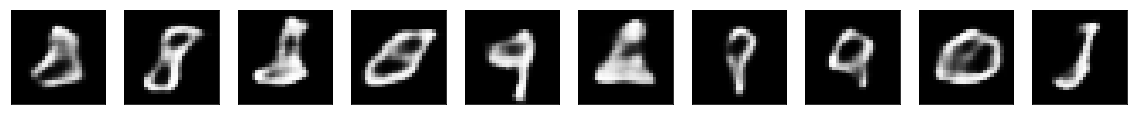

3000 [D loss: 0.660203, acc.: 56.25%] [G loss: 0.870043]
3001 [D loss: 0.640539, acc.: 61.72%] [G loss: 0.841571]
3002 [D loss: 0.642426, acc.: 62.50%] [G loss: 0.844442]
3003 [D loss: 0.617611, acc.: 73.44%] [G loss: 0.819282]
3004 [D loss: 0.638578, acc.: 61.72%] [G loss: 0.837813]
3005 [D loss: 0.645597, acc.: 60.16%] [G loss: 0.848254]
3006 [D loss: 0.637679, acc.: 67.19%] [G loss: 0.854953]
3007 [D loss: 0.656041, acc.: 59.38%] [G loss: 0.838522]
3008 [D loss: 0.651158, acc.: 58.59%] [G loss: 0.808408]
3009 [D loss: 0.620035, acc.: 75.78%] [G loss: 0.814093]
3010 [D loss: 0.641934, acc.: 67.97%] [G loss: 0.844332]
3011 [D loss: 0.640002, acc.: 67.19%] [G loss: 0.874580]
3012 [D loss: 0.636996, acc.: 66.41%] [G loss: 0.933016]
3013 [D loss: 0.631680, acc.: 66.41%] [G loss: 0.850501]
3014 [D loss: 0.621667, acc.: 61.72%] [G loss: 0.940874]
3015 [D loss: 0.632276, acc.: 68.75%] [G loss: 0.920520]
3016 [D loss: 0.657352, acc.: 67.97%] [G loss: 0.909224]
3017 [D loss: 0.622580, acc.: 7

3144 [D loss: 0.640492, acc.: 66.41%] [G loss: 0.830913]
3145 [D loss: 0.646435, acc.: 61.72%] [G loss: 0.883675]
3146 [D loss: 0.650907, acc.: 61.72%] [G loss: 0.948283]
3147 [D loss: 0.664531, acc.: 57.81%] [G loss: 0.873485]
3148 [D loss: 0.678166, acc.: 64.84%] [G loss: 0.848910]
3149 [D loss: 0.639037, acc.: 57.81%] [G loss: 0.794644]
3150 [D loss: 0.619363, acc.: 71.88%] [G loss: 0.826910]
3151 [D loss: 0.614235, acc.: 66.41%] [G loss: 0.831396]
3152 [D loss: 0.629690, acc.: 57.03%] [G loss: 0.846719]
3153 [D loss: 0.634349, acc.: 64.06%] [G loss: 0.835235]
3154 [D loss: 0.641488, acc.: 65.62%] [G loss: 0.831993]
3155 [D loss: 0.628081, acc.: 70.31%] [G loss: 0.799613]
3156 [D loss: 0.640861, acc.: 64.84%] [G loss: 0.838622]
3157 [D loss: 0.622137, acc.: 69.53%] [G loss: 0.854913]
3158 [D loss: 0.649606, acc.: 61.72%] [G loss: 0.844717]
3159 [D loss: 0.638619, acc.: 61.72%] [G loss: 0.848323]
3160 [D loss: 0.655439, acc.: 65.62%] [G loss: 0.843615]
3161 [D loss: 0.648457, acc.: 5

3292 [D loss: 0.655013, acc.: 61.72%] [G loss: 0.835549]
3293 [D loss: 0.602048, acc.: 72.66%] [G loss: 0.844783]
3294 [D loss: 0.675307, acc.: 61.72%] [G loss: 0.783682]
3295 [D loss: 0.625750, acc.: 69.53%] [G loss: 0.813994]
3296 [D loss: 0.638475, acc.: 59.38%] [G loss: 0.803747]
3297 [D loss: 0.625161, acc.: 64.84%] [G loss: 0.837448]
3298 [D loss: 0.651416, acc.: 62.50%] [G loss: 0.797283]
3299 [D loss: 0.649981, acc.: 58.59%] [G loss: 0.840241]
3300 [D loss: 0.656629, acc.: 57.03%] [G loss: 0.819667]
3301 [D loss: 0.623894, acc.: 74.22%] [G loss: 0.850923]
3302 [D loss: 0.632114, acc.: 67.97%] [G loss: 0.879371]
3303 [D loss: 0.662188, acc.: 58.59%] [G loss: 0.889395]
3304 [D loss: 0.622989, acc.: 71.09%] [G loss: 0.814485]
3305 [D loss: 0.610363, acc.: 72.66%] [G loss: 0.868294]
3306 [D loss: 0.639693, acc.: 66.41%] [G loss: 0.896408]
3307 [D loss: 0.652337, acc.: 64.84%] [G loss: 0.804467]
3308 [D loss: 0.597381, acc.: 73.44%] [G loss: 0.866623]
3309 [D loss: 0.629911, acc.: 6

3441 [D loss: 0.627381, acc.: 66.41%] [G loss: 0.893132]
3442 [D loss: 0.633765, acc.: 64.06%] [G loss: 0.873313]
3443 [D loss: 0.657519, acc.: 55.47%] [G loss: 0.852444]
3444 [D loss: 0.636478, acc.: 62.50%] [G loss: 0.892452]
3445 [D loss: 0.633245, acc.: 64.84%] [G loss: 0.881576]
3446 [D loss: 0.629642, acc.: 67.19%] [G loss: 0.892772]
3447 [D loss: 0.654279, acc.: 56.25%] [G loss: 0.856336]
3448 [D loss: 0.638739, acc.: 69.53%] [G loss: 0.839160]
3449 [D loss: 0.618365, acc.: 64.06%] [G loss: 0.907802]
3450 [D loss: 0.631560, acc.: 63.28%] [G loss: 0.873850]
3451 [D loss: 0.627328, acc.: 67.19%] [G loss: 0.845153]
3452 [D loss: 0.638720, acc.: 67.19%] [G loss: 0.868161]
3453 [D loss: 0.646212, acc.: 66.41%] [G loss: 0.843714]
3454 [D loss: 0.638388, acc.: 64.06%] [G loss: 0.850272]
3455 [D loss: 0.651795, acc.: 68.75%] [G loss: 0.868974]
3456 [D loss: 0.654021, acc.: 59.38%] [G loss: 0.931596]
3457 [D loss: 0.643518, acc.: 64.84%] [G loss: 0.894150]
3458 [D loss: 0.661611, acc.: 5

3586 [D loss: 0.636944, acc.: 67.19%] [G loss: 0.846857]
3587 [D loss: 0.633932, acc.: 67.97%] [G loss: 0.858003]
3588 [D loss: 0.635315, acc.: 70.31%] [G loss: 0.847601]
3589 [D loss: 0.639577, acc.: 61.72%] [G loss: 0.847096]
3590 [D loss: 0.637866, acc.: 63.28%] [G loss: 0.847842]
3591 [D loss: 0.646114, acc.: 68.75%] [G loss: 0.830401]
3592 [D loss: 0.649317, acc.: 64.06%] [G loss: 0.826270]
3593 [D loss: 0.644028, acc.: 65.62%] [G loss: 0.915489]
3594 [D loss: 0.636302, acc.: 64.06%] [G loss: 0.934193]
3595 [D loss: 0.635910, acc.: 66.41%] [G loss: 0.971163]
3596 [D loss: 0.652520, acc.: 59.38%] [G loss: 0.895883]
3597 [D loss: 0.639807, acc.: 67.19%] [G loss: 0.885442]
3598 [D loss: 0.650156, acc.: 64.06%] [G loss: 0.826382]
3599 [D loss: 0.601016, acc.: 71.88%] [G loss: 0.889940]
3600 [D loss: 0.677367, acc.: 60.94%] [G loss: 0.920405]
3601 [D loss: 0.640058, acc.: 63.28%] [G loss: 0.967139]
3602 [D loss: 0.672784, acc.: 57.03%] [G loss: 0.854417]
3603 [D loss: 0.638301, acc.: 6

3733 [D loss: 0.629343, acc.: 61.72%] [G loss: 0.840066]
3734 [D loss: 0.651393, acc.: 61.72%] [G loss: 0.918955]
3735 [D loss: 0.668423, acc.: 59.38%] [G loss: 0.955417]
3736 [D loss: 0.658195, acc.: 60.16%] [G loss: 0.970657]
3737 [D loss: 0.690384, acc.: 56.25%] [G loss: 0.867203]
3738 [D loss: 0.636650, acc.: 64.06%] [G loss: 0.816581]
3739 [D loss: 0.627294, acc.: 66.41%] [G loss: 0.801135]
3740 [D loss: 0.643840, acc.: 64.84%] [G loss: 0.829725]
3741 [D loss: 0.645570, acc.: 66.41%] [G loss: 0.853784]
3742 [D loss: 0.647931, acc.: 64.06%] [G loss: 0.858282]
3743 [D loss: 0.649774, acc.: 61.72%] [G loss: 0.857743]
3744 [D loss: 0.671428, acc.: 57.81%] [G loss: 0.893895]
3745 [D loss: 0.647766, acc.: 63.28%] [G loss: 0.903408]
3746 [D loss: 0.621398, acc.: 67.97%] [G loss: 0.854832]
3747 [D loss: 0.616086, acc.: 60.16%] [G loss: 0.833153]
3748 [D loss: 0.636550, acc.: 61.72%] [G loss: 0.838520]
3749 [D loss: 0.624858, acc.: 69.53%] [G loss: 0.855258]
3750 [D loss: 0.685823, acc.: 5

3877 [D loss: 0.608562, acc.: 68.75%] [G loss: 0.844211]
3878 [D loss: 0.625190, acc.: 61.72%] [G loss: 0.857202]
3879 [D loss: 0.636165, acc.: 64.84%] [G loss: 0.930811]
3880 [D loss: 0.635731, acc.: 67.97%] [G loss: 0.912944]
3881 [D loss: 0.632598, acc.: 62.50%] [G loss: 0.843693]
3882 [D loss: 0.620066, acc.: 69.53%] [G loss: 0.854699]
3883 [D loss: 0.659022, acc.: 62.50%] [G loss: 0.826898]
3884 [D loss: 0.646973, acc.: 64.84%] [G loss: 0.841892]
3885 [D loss: 0.588649, acc.: 65.62%] [G loss: 0.873493]
3886 [D loss: 0.629155, acc.: 68.75%] [G loss: 0.843035]
3887 [D loss: 0.623254, acc.: 66.41%] [G loss: 0.827313]
3888 [D loss: 0.665355, acc.: 59.38%] [G loss: 0.839024]
3889 [D loss: 0.630308, acc.: 70.31%] [G loss: 0.876609]
3890 [D loss: 0.619449, acc.: 64.06%] [G loss: 0.840454]
3891 [D loss: 0.633879, acc.: 60.94%] [G loss: 0.864576]
3892 [D loss: 0.651240, acc.: 60.16%] [G loss: 0.898029]
3893 [D loss: 0.669526, acc.: 54.69%] [G loss: 0.897416]
3894 [D loss: 0.631809, acc.: 6

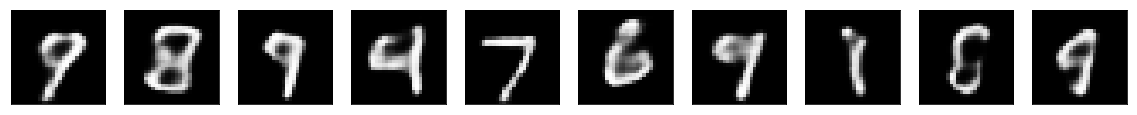

4000 [D loss: 0.653064, acc.: 62.50%] [G loss: 0.863734]
4001 [D loss: 0.650882, acc.: 64.84%] [G loss: 0.863687]
4002 [D loss: 0.669351, acc.: 55.47%] [G loss: 0.863835]
4003 [D loss: 0.669701, acc.: 57.03%] [G loss: 0.896291]
4004 [D loss: 0.656214, acc.: 57.03%] [G loss: 0.866091]
4005 [D loss: 0.670671, acc.: 58.59%] [G loss: 0.839048]
4006 [D loss: 0.646726, acc.: 64.06%] [G loss: 0.823266]
4007 [D loss: 0.618945, acc.: 73.44%] [G loss: 0.840166]
4008 [D loss: 0.619694, acc.: 75.78%] [G loss: 0.813451]
4009 [D loss: 0.627921, acc.: 65.62%] [G loss: 0.839406]
4010 [D loss: 0.616919, acc.: 68.75%] [G loss: 0.827871]
4011 [D loss: 0.677912, acc.: 58.59%] [G loss: 0.870318]
4012 [D loss: 0.643288, acc.: 64.06%] [G loss: 0.926191]
4013 [D loss: 0.638955, acc.: 66.41%] [G loss: 0.864535]
4014 [D loss: 0.620469, acc.: 71.09%] [G loss: 0.867470]
4015 [D loss: 0.626084, acc.: 64.84%] [G loss: 0.820493]
4016 [D loss: 0.648584, acc.: 61.72%] [G loss: 0.846849]
4017 [D loss: 0.667102, acc.: 5

4146 [D loss: 0.620929, acc.: 72.66%] [G loss: 0.839729]
4147 [D loss: 0.645415, acc.: 63.28%] [G loss: 0.824500]
4148 [D loss: 0.647537, acc.: 64.84%] [G loss: 0.844932]
4149 [D loss: 0.640039, acc.: 65.62%] [G loss: 0.849900]
4150 [D loss: 0.654525, acc.: 64.84%] [G loss: 0.850898]
4151 [D loss: 0.603249, acc.: 73.44%] [G loss: 0.822521]
4152 [D loss: 0.633567, acc.: 64.06%] [G loss: 0.844475]
4153 [D loss: 0.689245, acc.: 57.81%] [G loss: 0.859416]
4154 [D loss: 0.653038, acc.: 68.75%] [G loss: 0.854169]
4155 [D loss: 0.618569, acc.: 75.00%] [G loss: 0.823422]
4156 [D loss: 0.655678, acc.: 63.28%] [G loss: 0.841112]
4157 [D loss: 0.608147, acc.: 66.41%] [G loss: 0.888052]
4158 [D loss: 0.684203, acc.: 58.59%] [G loss: 0.925111]
4159 [D loss: 0.677288, acc.: 59.38%] [G loss: 0.926026]
4160 [D loss: 0.678293, acc.: 58.59%] [G loss: 0.884424]
4161 [D loss: 0.632211, acc.: 64.84%] [G loss: 0.845689]
4162 [D loss: 0.631741, acc.: 64.06%] [G loss: 0.864678]
4163 [D loss: 0.645713, acc.: 5

4292 [D loss: 0.657926, acc.: 55.47%] [G loss: 0.859140]
4293 [D loss: 0.629300, acc.: 67.19%] [G loss: 0.824844]
4294 [D loss: 0.639781, acc.: 68.75%] [G loss: 0.852830]
4295 [D loss: 0.624315, acc.: 71.09%] [G loss: 0.815301]
4296 [D loss: 0.628182, acc.: 71.09%] [G loss: 0.840673]
4297 [D loss: 0.652090, acc.: 65.62%] [G loss: 0.868198]
4298 [D loss: 0.651625, acc.: 60.16%] [G loss: 0.854118]
4299 [D loss: 0.654113, acc.: 61.72%] [G loss: 0.852478]
4300 [D loss: 0.628017, acc.: 65.62%] [G loss: 0.873508]
4301 [D loss: 0.603532, acc.: 71.88%] [G loss: 0.890608]
4302 [D loss: 0.651179, acc.: 63.28%] [G loss: 0.856934]
4303 [D loss: 0.653556, acc.: 60.94%] [G loss: 0.844916]
4304 [D loss: 0.621663, acc.: 66.41%] [G loss: 0.873566]
4305 [D loss: 0.636269, acc.: 52.34%] [G loss: 0.846289]
4306 [D loss: 0.679229, acc.: 56.25%] [G loss: 0.877758]
4307 [D loss: 0.613779, acc.: 77.34%] [G loss: 0.859298]
4308 [D loss: 0.660870, acc.: 59.38%] [G loss: 0.859005]
4309 [D loss: 0.668096, acc.: 5

4437 [D loss: 0.640977, acc.: 61.72%] [G loss: 0.869530]
4438 [D loss: 0.635750, acc.: 63.28%] [G loss: 0.914802]
4439 [D loss: 0.669482, acc.: 55.47%] [G loss: 0.892334]
4440 [D loss: 0.651376, acc.: 60.16%] [G loss: 0.962535]
4441 [D loss: 0.701839, acc.: 50.78%] [G loss: 0.835589]
4442 [D loss: 0.642025, acc.: 61.72%] [G loss: 0.810607]
4443 [D loss: 0.675117, acc.: 57.03%] [G loss: 0.835146]
4444 [D loss: 0.631348, acc.: 64.06%] [G loss: 0.838987]
4445 [D loss: 0.640960, acc.: 62.50%] [G loss: 0.838773]
4446 [D loss: 0.639446, acc.: 65.62%] [G loss: 0.848201]
4447 [D loss: 0.627630, acc.: 66.41%] [G loss: 0.810456]
4448 [D loss: 0.647436, acc.: 60.94%] [G loss: 0.876678]
4449 [D loss: 0.667047, acc.: 64.84%] [G loss: 0.847843]
4450 [D loss: 0.633867, acc.: 63.28%] [G loss: 0.869539]
4451 [D loss: 0.659211, acc.: 58.59%] [G loss: 0.839560]
4452 [D loss: 0.613390, acc.: 69.53%] [G loss: 0.862000]
4453 [D loss: 0.615893, acc.: 64.06%] [G loss: 0.880923]
4454 [D loss: 0.671152, acc.: 5

4587 [D loss: 0.638171, acc.: 66.41%] [G loss: 0.851421]
4588 [D loss: 0.645726, acc.: 55.47%] [G loss: 0.862705]
4589 [D loss: 0.624180, acc.: 65.62%] [G loss: 0.872815]
4590 [D loss: 0.605865, acc.: 71.88%] [G loss: 0.890328]
4591 [D loss: 0.688230, acc.: 55.47%] [G loss: 0.907933]
4592 [D loss: 0.642320, acc.: 58.59%] [G loss: 0.896618]
4593 [D loss: 0.643282, acc.: 67.19%] [G loss: 0.830286]
4594 [D loss: 0.637041, acc.: 68.75%] [G loss: 0.861537]
4595 [D loss: 0.679840, acc.: 60.94%] [G loss: 0.848505]
4596 [D loss: 0.651900, acc.: 64.84%] [G loss: 0.866846]
4597 [D loss: 0.640926, acc.: 63.28%] [G loss: 0.827126]
4598 [D loss: 0.635000, acc.: 67.97%] [G loss: 0.828685]
4599 [D loss: 0.630135, acc.: 67.19%] [G loss: 0.827350]
4600 [D loss: 0.626289, acc.: 61.72%] [G loss: 0.846509]
4601 [D loss: 0.631076, acc.: 67.19%] [G loss: 0.852660]
4602 [D loss: 0.651733, acc.: 64.84%] [G loss: 0.883451]
4603 [D loss: 0.658850, acc.: 62.50%] [G loss: 0.839018]
4604 [D loss: 0.611589, acc.: 7

4733 [D loss: 0.649375, acc.: 62.50%] [G loss: 0.860368]
4734 [D loss: 0.632045, acc.: 64.84%] [G loss: 0.826456]
4735 [D loss: 0.649747, acc.: 57.81%] [G loss: 0.858528]
4736 [D loss: 0.633112, acc.: 65.62%] [G loss: 0.843408]
4737 [D loss: 0.649213, acc.: 62.50%] [G loss: 0.894617]
4738 [D loss: 0.648242, acc.: 63.28%] [G loss: 0.887647]
4739 [D loss: 0.647688, acc.: 64.84%] [G loss: 1.026162]
4740 [D loss: 0.655129, acc.: 57.03%] [G loss: 0.874188]
4741 [D loss: 0.653083, acc.: 64.06%] [G loss: 0.828859]
4742 [D loss: 0.598608, acc.: 71.88%] [G loss: 0.846394]
4743 [D loss: 0.643640, acc.: 65.62%] [G loss: 0.872820]
4744 [D loss: 0.651131, acc.: 62.50%] [G loss: 0.955611]
4745 [D loss: 0.665553, acc.: 59.38%] [G loss: 0.909390]
4746 [D loss: 0.704106, acc.: 51.56%] [G loss: 0.894269]
4747 [D loss: 0.634416, acc.: 66.41%] [G loss: 0.855672]
4748 [D loss: 0.600853, acc.: 69.53%] [G loss: 0.902048]
4749 [D loss: 0.668504, acc.: 57.81%] [G loss: 0.872974]
4750 [D loss: 0.629336, acc.: 6

4878 [D loss: 0.664402, acc.: 58.59%] [G loss: 0.826546]
4879 [D loss: 0.639175, acc.: 65.62%] [G loss: 0.878893]
4880 [D loss: 0.637160, acc.: 65.62%] [G loss: 0.834378]
4881 [D loss: 0.651123, acc.: 64.84%] [G loss: 0.905138]
4882 [D loss: 0.657944, acc.: 60.94%] [G loss: 0.838266]
4883 [D loss: 0.644050, acc.: 61.72%] [G loss: 0.855104]
4884 [D loss: 0.646672, acc.: 60.94%] [G loss: 0.923670]
4885 [D loss: 0.662624, acc.: 57.81%] [G loss: 0.945860]
4886 [D loss: 0.654364, acc.: 54.69%] [G loss: 0.832377]
4887 [D loss: 0.641479, acc.: 68.75%] [G loss: 0.834176]
4888 [D loss: 0.626795, acc.: 67.19%] [G loss: 0.834642]
4889 [D loss: 0.614832, acc.: 67.19%] [G loss: 0.841154]
4890 [D loss: 0.640230, acc.: 64.84%] [G loss: 0.839989]
4891 [D loss: 0.603260, acc.: 71.09%] [G loss: 0.861412]
4892 [D loss: 0.648992, acc.: 60.94%] [G loss: 0.883153]
4893 [D loss: 0.652187, acc.: 58.59%] [G loss: 0.867593]
4894 [D loss: 0.660572, acc.: 58.59%] [G loss: 0.834148]
4895 [D loss: 0.617091, acc.: 7

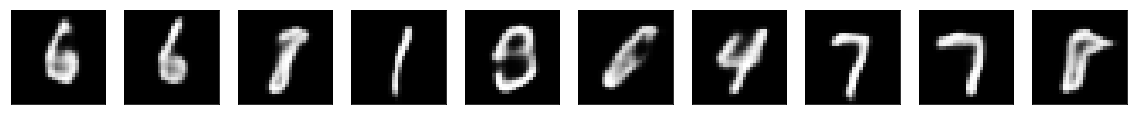

5000 [D loss: 0.613740, acc.: 64.84%] [G loss: 0.855923]
5001 [D loss: 0.612980, acc.: 69.53%] [G loss: 0.831607]
5002 [D loss: 0.607377, acc.: 65.62%] [G loss: 0.876925]
5003 [D loss: 0.610349, acc.: 67.97%] [G loss: 0.831660]
5004 [D loss: 0.631076, acc.: 65.62%] [G loss: 0.839876]
5005 [D loss: 0.615230, acc.: 68.75%] [G loss: 0.804220]
5006 [D loss: 0.619798, acc.: 71.88%] [G loss: 0.849241]
5007 [D loss: 0.618139, acc.: 69.53%] [G loss: 0.852957]
5008 [D loss: 0.655125, acc.: 63.28%] [G loss: 0.844562]
5009 [D loss: 0.646194, acc.: 63.28%] [G loss: 0.870155]
5010 [D loss: 0.590639, acc.: 76.56%] [G loss: 0.897713]
5011 [D loss: 0.669665, acc.: 57.03%] [G loss: 0.886340]
5012 [D loss: 0.659088, acc.: 60.16%] [G loss: 0.861425]
5013 [D loss: 0.641417, acc.: 58.59%] [G loss: 0.855293]
5014 [D loss: 0.650474, acc.: 69.53%] [G loss: 0.888685]
5015 [D loss: 0.603296, acc.: 70.31%] [G loss: 0.868559]
5016 [D loss: 0.633861, acc.: 66.41%] [G loss: 0.853375]
5017 [D loss: 0.655715, acc.: 6

5146 [D loss: 0.622910, acc.: 67.97%] [G loss: 0.857267]
5147 [D loss: 0.632871, acc.: 67.97%] [G loss: 0.853634]
5148 [D loss: 0.647053, acc.: 62.50%] [G loss: 0.849353]
5149 [D loss: 0.649064, acc.: 66.41%] [G loss: 0.853228]
5150 [D loss: 0.631434, acc.: 66.41%] [G loss: 0.871702]
5151 [D loss: 0.606703, acc.: 71.88%] [G loss: 0.887298]
5152 [D loss: 0.619056, acc.: 67.97%] [G loss: 0.865259]
5153 [D loss: 0.642153, acc.: 66.41%] [G loss: 0.886485]
5154 [D loss: 0.658312, acc.: 65.62%] [G loss: 0.870433]
5155 [D loss: 0.638201, acc.: 61.72%] [G loss: 0.881304]
5156 [D loss: 0.639231, acc.: 64.06%] [G loss: 0.833781]
5157 [D loss: 0.614647, acc.: 68.75%] [G loss: 0.822822]
5158 [D loss: 0.643144, acc.: 64.84%] [G loss: 0.817422]
5159 [D loss: 0.642514, acc.: 57.03%] [G loss: 0.857631]
5160 [D loss: 0.623872, acc.: 66.41%] [G loss: 0.907592]
5161 [D loss: 0.606531, acc.: 65.62%] [G loss: 0.895811]
5162 [D loss: 0.654287, acc.: 66.41%] [G loss: 0.828151]
5163 [D loss: 0.619933, acc.: 6

5290 [D loss: 0.630668, acc.: 69.53%] [G loss: 0.881187]
5291 [D loss: 0.630894, acc.: 67.97%] [G loss: 0.856001]
5292 [D loss: 0.627635, acc.: 64.06%] [G loss: 0.862502]
5293 [D loss: 0.623433, acc.: 71.09%] [G loss: 0.811208]
5294 [D loss: 0.637382, acc.: 61.72%] [G loss: 0.842060]
5295 [D loss: 0.636359, acc.: 60.94%] [G loss: 0.846108]
5296 [D loss: 0.630610, acc.: 69.53%] [G loss: 0.872301]
5297 [D loss: 0.638056, acc.: 68.75%] [G loss: 0.852736]
5298 [D loss: 0.647204, acc.: 62.50%] [G loss: 0.884819]
5299 [D loss: 0.688410, acc.: 57.03%] [G loss: 0.940267]
5300 [D loss: 0.642534, acc.: 55.47%] [G loss: 0.946823]
5301 [D loss: 0.637957, acc.: 64.84%] [G loss: 0.874638]
5302 [D loss: 0.619172, acc.: 64.06%] [G loss: 0.855525]
5303 [D loss: 0.610631, acc.: 71.09%] [G loss: 0.840343]
5304 [D loss: 0.645765, acc.: 65.62%] [G loss: 0.849805]
5305 [D loss: 0.649650, acc.: 63.28%] [G loss: 0.879867]
5306 [D loss: 0.649573, acc.: 55.47%] [G loss: 0.862303]
5307 [D loss: 0.633555, acc.: 6

5438 [D loss: 0.652521, acc.: 54.69%] [G loss: 0.843868]
5439 [D loss: 0.630612, acc.: 62.50%] [G loss: 0.876598]
5440 [D loss: 0.636472, acc.: 65.62%] [G loss: 0.856611]
5441 [D loss: 0.623621, acc.: 72.66%] [G loss: 0.877999]
5442 [D loss: 0.633847, acc.: 67.19%] [G loss: 0.877748]
5443 [D loss: 0.647513, acc.: 64.84%] [G loss: 0.844312]
5444 [D loss: 0.654725, acc.: 63.28%] [G loss: 0.845433]
5445 [D loss: 0.632158, acc.: 69.53%] [G loss: 0.882420]
5446 [D loss: 0.621004, acc.: 68.75%] [G loss: 0.851306]
5447 [D loss: 0.616596, acc.: 68.75%] [G loss: 0.855319]
5448 [D loss: 0.622986, acc.: 69.53%] [G loss: 0.839827]
5449 [D loss: 0.648122, acc.: 61.72%] [G loss: 0.855414]
5450 [D loss: 0.642870, acc.: 64.84%] [G loss: 0.872840]
5451 [D loss: 0.663049, acc.: 57.03%] [G loss: 0.865427]
5452 [D loss: 0.606199, acc.: 70.31%] [G loss: 0.858530]
5453 [D loss: 0.614891, acc.: 74.22%] [G loss: 0.857316]
5454 [D loss: 0.601242, acc.: 68.75%] [G loss: 0.831573]
5455 [D loss: 0.620432, acc.: 6

5582 [D loss: 0.627480, acc.: 64.06%] [G loss: 0.867373]
5583 [D loss: 0.629750, acc.: 71.09%] [G loss: 0.901609]
5584 [D loss: 0.622415, acc.: 66.41%] [G loss: 0.923090]
5585 [D loss: 0.626920, acc.: 65.62%] [G loss: 0.860892]
5586 [D loss: 0.637953, acc.: 64.84%] [G loss: 0.867161]
5587 [D loss: 0.624164, acc.: 70.31%] [G loss: 0.881535]
5588 [D loss: 0.643032, acc.: 61.72%] [G loss: 0.921754]
5589 [D loss: 0.642306, acc.: 65.62%] [G loss: 0.912374]
5590 [D loss: 0.670669, acc.: 55.47%] [G loss: 0.989678]
5591 [D loss: 0.647244, acc.: 62.50%] [G loss: 0.834935]
5592 [D loss: 0.594830, acc.: 64.06%] [G loss: 0.878710]
5593 [D loss: 0.637136, acc.: 60.16%] [G loss: 0.880517]
5594 [D loss: 0.642677, acc.: 64.84%] [G loss: 0.860773]
5595 [D loss: 0.619933, acc.: 68.75%] [G loss: 0.906812]
5596 [D loss: 0.615314, acc.: 66.41%] [G loss: 0.883111]
5597 [D loss: 0.649066, acc.: 64.06%] [G loss: 0.883934]
5598 [D loss: 0.616828, acc.: 71.09%] [G loss: 0.874565]
5599 [D loss: 0.638539, acc.: 6

5729 [D loss: 0.621656, acc.: 66.41%] [G loss: 0.868861]
5730 [D loss: 0.634804, acc.: 63.28%] [G loss: 0.853855]
5731 [D loss: 0.601371, acc.: 71.88%] [G loss: 0.867055]
5732 [D loss: 0.627543, acc.: 62.50%] [G loss: 0.850903]
5733 [D loss: 0.663535, acc.: 62.50%] [G loss: 0.856130]
5734 [D loss: 0.665477, acc.: 56.25%] [G loss: 0.852083]
5735 [D loss: 0.661241, acc.: 62.50%] [G loss: 0.914874]
5736 [D loss: 0.673862, acc.: 51.56%] [G loss: 0.837338]
5737 [D loss: 0.654547, acc.: 62.50%] [G loss: 0.869689]
5738 [D loss: 0.623384, acc.: 69.53%] [G loss: 0.828141]
5739 [D loss: 0.605508, acc.: 72.66%] [G loss: 0.903971]
5740 [D loss: 0.637934, acc.: 63.28%] [G loss: 0.871274]
5741 [D loss: 0.609974, acc.: 70.31%] [G loss: 0.886015]
5742 [D loss: 0.619166, acc.: 68.75%] [G loss: 0.857155]
5743 [D loss: 0.624266, acc.: 67.97%] [G loss: 0.865644]
5744 [D loss: 0.630387, acc.: 64.84%] [G loss: 0.895575]
5745 [D loss: 0.649199, acc.: 62.50%] [G loss: 0.917019]
5746 [D loss: 0.646095, acc.: 6

5875 [D loss: 0.637949, acc.: 57.81%] [G loss: 0.866451]
5876 [D loss: 0.636623, acc.: 64.84%] [G loss: 0.868869]
5877 [D loss: 0.631707, acc.: 67.19%] [G loss: 0.854219]
5878 [D loss: 0.619780, acc.: 71.09%] [G loss: 0.860741]
5879 [D loss: 0.629580, acc.: 66.41%] [G loss: 0.859481]
5880 [D loss: 0.655304, acc.: 54.69%] [G loss: 0.848090]
5881 [D loss: 0.673649, acc.: 59.38%] [G loss: 0.900522]
5882 [D loss: 0.659469, acc.: 64.06%] [G loss: 0.854745]
5883 [D loss: 0.629822, acc.: 63.28%] [G loss: 0.848877]
5884 [D loss: 0.637628, acc.: 66.41%] [G loss: 0.861781]
5885 [D loss: 0.621885, acc.: 67.97%] [G loss: 0.884509]
5886 [D loss: 0.629764, acc.: 63.28%] [G loss: 0.845407]
5887 [D loss: 0.601495, acc.: 67.97%] [G loss: 0.826875]
5888 [D loss: 0.594669, acc.: 71.09%] [G loss: 0.872180]
5889 [D loss: 0.670407, acc.: 55.47%] [G loss: 0.862477]
5890 [D loss: 0.659987, acc.: 55.47%] [G loss: 0.847515]
5891 [D loss: 0.608754, acc.: 69.53%] [G loss: 0.848220]
5892 [D loss: 0.668919, acc.: 6

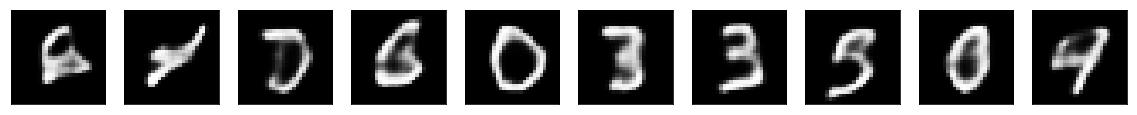

6000 [D loss: 0.679512, acc.: 52.34%] [G loss: 0.867756]
6001 [D loss: 0.621461, acc.: 67.97%] [G loss: 0.859429]
6002 [D loss: 0.649841, acc.: 61.72%] [G loss: 0.861037]
6003 [D loss: 0.629754, acc.: 64.06%] [G loss: 0.863612]
6004 [D loss: 0.637258, acc.: 64.84%] [G loss: 0.837054]
6005 [D loss: 0.618264, acc.: 64.84%] [G loss: 0.878362]
6006 [D loss: 0.625962, acc.: 63.28%] [G loss: 0.858006]
6007 [D loss: 0.637921, acc.: 63.28%] [G loss: 0.879512]
6008 [D loss: 0.661756, acc.: 62.50%] [G loss: 0.886639]
6009 [D loss: 0.618939, acc.: 64.84%] [G loss: 0.887772]
6010 [D loss: 0.641263, acc.: 61.72%] [G loss: 0.940906]
6011 [D loss: 0.651333, acc.: 68.75%] [G loss: 0.862783]
6012 [D loss: 0.632895, acc.: 64.06%] [G loss: 0.879817]
6013 [D loss: 0.617766, acc.: 68.75%] [G loss: 0.888505]
6014 [D loss: 0.638622, acc.: 67.97%] [G loss: 0.862675]
6015 [D loss: 0.629204, acc.: 67.19%] [G loss: 0.830658]
6016 [D loss: 0.630023, acc.: 67.19%] [G loss: 0.862449]
6017 [D loss: 0.661577, acc.: 6

6149 [D loss: 0.619364, acc.: 65.62%] [G loss: 0.935233]
6150 [D loss: 0.635818, acc.: 65.62%] [G loss: 0.903605]
6151 [D loss: 0.629940, acc.: 67.19%] [G loss: 1.000137]
6152 [D loss: 0.655452, acc.: 59.38%] [G loss: 0.863570]
6153 [D loss: 0.622548, acc.: 65.62%] [G loss: 0.852088]
6154 [D loss: 0.615041, acc.: 71.09%] [G loss: 0.851638]
6155 [D loss: 0.606370, acc.: 72.66%] [G loss: 0.907493]
6156 [D loss: 0.635373, acc.: 67.19%] [G loss: 0.845349]
6157 [D loss: 0.628400, acc.: 66.41%] [G loss: 0.915709]
6158 [D loss: 0.613397, acc.: 64.84%] [G loss: 0.865241]
6159 [D loss: 0.630497, acc.: 63.28%] [G loss: 0.888285]
6160 [D loss: 0.634187, acc.: 66.41%] [G loss: 0.835048]
6161 [D loss: 0.618766, acc.: 67.19%] [G loss: 0.838253]
6162 [D loss: 0.678096, acc.: 52.34%] [G loss: 0.831547]
6163 [D loss: 0.648837, acc.: 64.84%] [G loss: 0.878271]
6164 [D loss: 0.619112, acc.: 64.06%] [G loss: 0.901031]
6165 [D loss: 0.640278, acc.: 63.28%] [G loss: 0.890571]
6166 [D loss: 0.648363, acc.: 6

6295 [D loss: 0.653391, acc.: 58.59%] [G loss: 0.860183]
6296 [D loss: 0.647883, acc.: 63.28%] [G loss: 0.835113]
6297 [D loss: 0.628880, acc.: 63.28%] [G loss: 0.874972]
6298 [D loss: 0.622900, acc.: 71.09%] [G loss: 0.850806]
6299 [D loss: 0.617710, acc.: 66.41%] [G loss: 0.863127]
6300 [D loss: 0.624281, acc.: 60.94%] [G loss: 0.862592]
6301 [D loss: 0.631984, acc.: 63.28%] [G loss: 0.881209]
6302 [D loss: 0.645458, acc.: 62.50%] [G loss: 0.833698]
6303 [D loss: 0.627491, acc.: 65.62%] [G loss: 0.910193]
6304 [D loss: 0.676354, acc.: 63.28%] [G loss: 0.885496]
6305 [D loss: 0.656285, acc.: 60.94%] [G loss: 0.916004]
6306 [D loss: 0.596137, acc.: 64.84%] [G loss: 0.867276]
6307 [D loss: 0.663631, acc.: 61.72%] [G loss: 0.871099]
6308 [D loss: 0.653287, acc.: 60.16%] [G loss: 0.925159]
6309 [D loss: 0.629052, acc.: 61.72%] [G loss: 0.897879]
6310 [D loss: 0.629300, acc.: 68.75%] [G loss: 0.887423]
6311 [D loss: 0.637084, acc.: 62.50%] [G loss: 0.886478]
6312 [D loss: 0.641065, acc.: 6

6443 [D loss: 0.652515, acc.: 58.59%] [G loss: 0.859167]
6444 [D loss: 0.649919, acc.: 65.62%] [G loss: 0.875473]
6445 [D loss: 0.651531, acc.: 57.81%] [G loss: 0.857724]
6446 [D loss: 0.669505, acc.: 57.81%] [G loss: 0.879445]
6447 [D loss: 0.618540, acc.: 66.41%] [G loss: 0.885132]
6448 [D loss: 0.651602, acc.: 61.72%] [G loss: 0.861391]
6449 [D loss: 0.639188, acc.: 58.59%] [G loss: 0.923105]
6450 [D loss: 0.642106, acc.: 60.16%] [G loss: 0.867575]
6451 [D loss: 0.651507, acc.: 67.97%] [G loss: 0.830424]
6452 [D loss: 0.648033, acc.: 61.72%] [G loss: 0.836204]
6453 [D loss: 0.616325, acc.: 65.62%] [G loss: 0.833598]
6454 [D loss: 0.637427, acc.: 68.75%] [G loss: 0.853409]
6455 [D loss: 0.631145, acc.: 63.28%] [G loss: 0.829501]
6456 [D loss: 0.651179, acc.: 67.97%] [G loss: 0.870070]
6457 [D loss: 0.655536, acc.: 62.50%] [G loss: 0.818466]
6458 [D loss: 0.622598, acc.: 66.41%] [G loss: 0.879980]
6459 [D loss: 0.637694, acc.: 66.41%] [G loss: 0.866045]
6460 [D loss: 0.666366, acc.: 5

6589 [D loss: 0.614358, acc.: 67.97%] [G loss: 0.892798]
6590 [D loss: 0.663048, acc.: 57.03%] [G loss: 0.880551]
6591 [D loss: 0.657895, acc.: 57.03%] [G loss: 0.872705]
6592 [D loss: 0.617260, acc.: 65.62%] [G loss: 0.835135]
6593 [D loss: 0.631600, acc.: 60.94%] [G loss: 0.837719]
6594 [D loss: 0.618773, acc.: 71.09%] [G loss: 0.878510]
6595 [D loss: 0.652142, acc.: 56.25%] [G loss: 0.860402]
6596 [D loss: 0.636118, acc.: 67.97%] [G loss: 0.901093]
6597 [D loss: 0.631794, acc.: 63.28%] [G loss: 0.876955]
6598 [D loss: 0.665644, acc.: 64.84%] [G loss: 0.862882]
6599 [D loss: 0.649248, acc.: 59.38%] [G loss: 0.843004]
6600 [D loss: 0.646088, acc.: 62.50%] [G loss: 0.869247]
6601 [D loss: 0.637008, acc.: 60.94%] [G loss: 0.871332]
6602 [D loss: 0.626307, acc.: 66.41%] [G loss: 0.868368]
6603 [D loss: 0.615036, acc.: 67.97%] [G loss: 0.845837]
6604 [D loss: 0.610632, acc.: 63.28%] [G loss: 0.884345]
6605 [D loss: 0.653848, acc.: 59.38%] [G loss: 0.869927]
6606 [D loss: 0.654189, acc.: 6

6739 [D loss: 0.633481, acc.: 63.28%] [G loss: 0.861446]
6740 [D loss: 0.656711, acc.: 62.50%] [G loss: 0.857748]
6741 [D loss: 0.661346, acc.: 63.28%] [G loss: 0.905394]
6742 [D loss: 0.645971, acc.: 63.28%] [G loss: 0.858196]
6743 [D loss: 0.664425, acc.: 56.25%] [G loss: 0.878535]
6744 [D loss: 0.636616, acc.: 70.31%] [G loss: 0.873689]
6745 [D loss: 0.635280, acc.: 70.31%] [G loss: 0.883907]
6746 [D loss: 0.630234, acc.: 62.50%] [G loss: 0.887129]
6747 [D loss: 0.667426, acc.: 59.38%] [G loss: 0.856697]
6748 [D loss: 0.616750, acc.: 65.62%] [G loss: 0.914411]
6749 [D loss: 0.621394, acc.: 66.41%] [G loss: 0.848337]
6750 [D loss: 0.624194, acc.: 67.19%] [G loss: 0.856501]
6751 [D loss: 0.655521, acc.: 63.28%] [G loss: 0.864321]
6752 [D loss: 0.639479, acc.: 65.62%] [G loss: 0.885288]
6753 [D loss: 0.625201, acc.: 64.84%] [G loss: 0.887860]
6754 [D loss: 0.657419, acc.: 66.41%] [G loss: 0.892246]
6755 [D loss: 0.654576, acc.: 61.72%] [G loss: 0.843305]
6756 [D loss: 0.664357, acc.: 5

6886 [D loss: 0.634885, acc.: 57.81%] [G loss: 0.896598]
6887 [D loss: 0.633205, acc.: 62.50%] [G loss: 0.899577]
6888 [D loss: 0.643424, acc.: 64.84%] [G loss: 0.892812]
6889 [D loss: 0.644795, acc.: 62.50%] [G loss: 0.958117]
6890 [D loss: 0.658950, acc.: 61.72%] [G loss: 0.842400]
6891 [D loss: 0.642331, acc.: 61.72%] [G loss: 0.830093]
6892 [D loss: 0.629675, acc.: 64.84%] [G loss: 0.847693]
6893 [D loss: 0.606836, acc.: 67.19%] [G loss: 0.861501]
6894 [D loss: 0.620310, acc.: 62.50%] [G loss: 0.897881]
6895 [D loss: 0.637943, acc.: 60.94%] [G loss: 0.824889]
6896 [D loss: 0.604720, acc.: 67.19%] [G loss: 0.878865]
6897 [D loss: 0.621780, acc.: 60.94%] [G loss: 0.863155]
6898 [D loss: 0.657717, acc.: 60.94%] [G loss: 0.872103]
6899 [D loss: 0.639649, acc.: 59.38%] [G loss: 0.862178]
6900 [D loss: 0.626778, acc.: 66.41%] [G loss: 0.839264]
6901 [D loss: 0.623225, acc.: 69.53%] [G loss: 0.899612]
6902 [D loss: 0.639824, acc.: 63.28%] [G loss: 0.860630]
6903 [D loss: 0.646545, acc.: 6

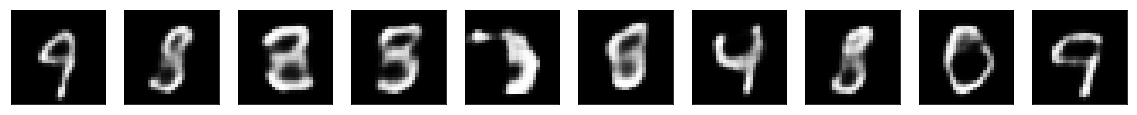

7000 [D loss: 0.642816, acc.: 61.72%] [G loss: 0.844464]
7001 [D loss: 0.622639, acc.: 66.41%] [G loss: 0.840535]
7002 [D loss: 0.629084, acc.: 66.41%] [G loss: 0.865266]
7003 [D loss: 0.593899, acc.: 71.88%] [G loss: 0.930900]
7004 [D loss: 0.631231, acc.: 72.66%] [G loss: 0.891010]
7005 [D loss: 0.645841, acc.: 60.16%] [G loss: 0.877535]
7006 [D loss: 0.674219, acc.: 57.03%] [G loss: 0.847557]
7007 [D loss: 0.640725, acc.: 64.84%] [G loss: 0.863712]
7008 [D loss: 0.634237, acc.: 67.97%] [G loss: 0.850265]
7009 [D loss: 0.660455, acc.: 63.28%] [G loss: 0.841251]
7010 [D loss: 0.654719, acc.: 66.41%] [G loss: 0.842803]
7011 [D loss: 0.666372, acc.: 57.03%] [G loss: 0.909356]
7012 [D loss: 0.657476, acc.: 56.25%] [G loss: 0.866024]
7013 [D loss: 0.632840, acc.: 60.94%] [G loss: 0.847789]
7014 [D loss: 0.643312, acc.: 60.94%] [G loss: 0.865364]
7015 [D loss: 0.645981, acc.: 64.84%] [G loss: 0.854113]
7016 [D loss: 0.641594, acc.: 64.84%] [G loss: 0.863239]
7017 [D loss: 0.610481, acc.: 6

7145 [D loss: 0.611908, acc.: 67.97%] [G loss: 0.842552]
7146 [D loss: 0.648436, acc.: 60.94%] [G loss: 0.851098]
7147 [D loss: 0.631572, acc.: 61.72%] [G loss: 0.871383]
7148 [D loss: 0.607110, acc.: 65.62%] [G loss: 0.854604]
7149 [D loss: 0.644930, acc.: 60.16%] [G loss: 0.835046]
7150 [D loss: 0.639919, acc.: 60.94%] [G loss: 0.836445]
7151 [D loss: 0.665236, acc.: 60.16%] [G loss: 0.887304]
7152 [D loss: 0.638666, acc.: 62.50%] [G loss: 0.855185]
7153 [D loss: 0.625407, acc.: 67.19%] [G loss: 0.867092]
7154 [D loss: 0.620908, acc.: 65.62%] [G loss: 0.838745]
7155 [D loss: 0.652724, acc.: 61.72%] [G loss: 0.832037]
7156 [D loss: 0.663121, acc.: 57.03%] [G loss: 0.887366]
7157 [D loss: 0.609035, acc.: 64.84%] [G loss: 0.870288]
7158 [D loss: 0.639008, acc.: 60.94%] [G loss: 0.868906]
7159 [D loss: 0.663187, acc.: 57.03%] [G loss: 0.903698]
7160 [D loss: 0.674336, acc.: 58.59%] [G loss: 0.865224]
7161 [D loss: 0.630585, acc.: 57.03%] [G loss: 0.861858]
7162 [D loss: 0.616951, acc.: 6

7290 [D loss: 0.626696, acc.: 63.28%] [G loss: 0.882797]
7291 [D loss: 0.609942, acc.: 69.53%] [G loss: 0.848144]
7292 [D loss: 0.646626, acc.: 60.16%] [G loss: 0.880115]
7293 [D loss: 0.650982, acc.: 57.81%] [G loss: 0.868008]
7294 [D loss: 0.600445, acc.: 67.97%] [G loss: 0.932901]
7295 [D loss: 0.674392, acc.: 57.03%] [G loss: 0.868492]
7296 [D loss: 0.641104, acc.: 59.38%] [G loss: 0.917961]
7297 [D loss: 0.657359, acc.: 57.03%] [G loss: 0.883036]
7298 [D loss: 0.630505, acc.: 61.72%] [G loss: 0.902026]
7299 [D loss: 0.626632, acc.: 67.97%] [G loss: 0.875889]
7300 [D loss: 0.661687, acc.: 62.50%] [G loss: 0.878101]
7301 [D loss: 0.670170, acc.: 57.81%] [G loss: 0.894324]
7302 [D loss: 0.633848, acc.: 65.62%] [G loss: 0.871807]
7303 [D loss: 0.636324, acc.: 62.50%] [G loss: 0.945594]
7304 [D loss: 0.665023, acc.: 58.59%] [G loss: 0.894130]
7305 [D loss: 0.634752, acc.: 66.41%] [G loss: 0.891032]
7306 [D loss: 0.645700, acc.: 59.38%] [G loss: 0.852982]
7307 [D loss: 0.647177, acc.: 6

7438 [D loss: 0.608810, acc.: 66.41%] [G loss: 0.928632]
7439 [D loss: 0.689164, acc.: 64.84%] [G loss: 0.885706]
7440 [D loss: 0.670501, acc.: 62.50%] [G loss: 0.880981]
7441 [D loss: 0.630855, acc.: 62.50%] [G loss: 0.893006]
7442 [D loss: 0.636186, acc.: 57.03%] [G loss: 0.807851]
7443 [D loss: 0.640834, acc.: 65.62%] [G loss: 0.845037]
7444 [D loss: 0.656414, acc.: 60.94%] [G loss: 0.888841]
7445 [D loss: 0.675873, acc.: 57.03%] [G loss: 0.887243]
7446 [D loss: 0.634947, acc.: 65.62%] [G loss: 0.848339]
7447 [D loss: 0.646098, acc.: 59.38%] [G loss: 0.871747]
7448 [D loss: 0.630151, acc.: 64.84%] [G loss: 0.883170]
7449 [D loss: 0.637164, acc.: 67.19%] [G loss: 0.858530]
7450 [D loss: 0.650275, acc.: 64.84%] [G loss: 0.854917]
7451 [D loss: 0.633483, acc.: 68.75%] [G loss: 0.871660]
7452 [D loss: 0.669690, acc.: 54.69%] [G loss: 0.908077]
7453 [D loss: 0.630508, acc.: 65.62%] [G loss: 0.866409]
7454 [D loss: 0.677501, acc.: 55.47%] [G loss: 0.849540]
7455 [D loss: 0.658751, acc.: 5

7586 [D loss: 0.625829, acc.: 60.16%] [G loss: 0.881005]
7587 [D loss: 0.598678, acc.: 68.75%] [G loss: 0.892972]
7588 [D loss: 0.622555, acc.: 62.50%] [G loss: 0.856386]
7589 [D loss: 0.668247, acc.: 59.38%] [G loss: 0.878460]
7590 [D loss: 0.662087, acc.: 59.38%] [G loss: 0.912137]
7591 [D loss: 0.628036, acc.: 67.19%] [G loss: 0.823240]
7592 [D loss: 0.631719, acc.: 64.84%] [G loss: 0.871387]
7593 [D loss: 0.632546, acc.: 64.84%] [G loss: 0.881611]
7594 [D loss: 0.652889, acc.: 60.94%] [G loss: 0.899017]
7595 [D loss: 0.614323, acc.: 71.88%] [G loss: 0.881150]
7596 [D loss: 0.627952, acc.: 57.81%] [G loss: 0.863740]
7597 [D loss: 0.650164, acc.: 63.28%] [G loss: 0.854834]
7598 [D loss: 0.651159, acc.: 59.38%] [G loss: 0.853841]
7599 [D loss: 0.655501, acc.: 58.59%] [G loss: 0.882186]
7600 [D loss: 0.658371, acc.: 60.16%] [G loss: 0.873581]
7601 [D loss: 0.635395, acc.: 63.28%] [G loss: 0.847038]
7602 [D loss: 0.631506, acc.: 68.75%] [G loss: 0.874471]
7603 [D loss: 0.615171, acc.: 6

7732 [D loss: 0.646267, acc.: 55.47%] [G loss: 0.846774]
7733 [D loss: 0.651005, acc.: 57.81%] [G loss: 0.911956]
7734 [D loss: 0.667837, acc.: 59.38%] [G loss: 0.862596]
7735 [D loss: 0.632227, acc.: 61.72%] [G loss: 0.880306]
7736 [D loss: 0.647277, acc.: 65.62%] [G loss: 0.889033]
7737 [D loss: 0.685692, acc.: 50.78%] [G loss: 0.851934]
7738 [D loss: 0.662298, acc.: 57.81%] [G loss: 0.846890]
7739 [D loss: 0.622668, acc.: 67.97%] [G loss: 0.859662]
7740 [D loss: 0.653540, acc.: 69.53%] [G loss: 0.862136]
7741 [D loss: 0.637606, acc.: 64.84%] [G loss: 0.884071]
7742 [D loss: 0.656575, acc.: 56.25%] [G loss: 0.859683]
7743 [D loss: 0.658472, acc.: 59.38%] [G loss: 0.857737]
7744 [D loss: 0.624700, acc.: 58.59%] [G loss: 0.863357]
7745 [D loss: 0.644010, acc.: 58.59%] [G loss: 0.884040]
7746 [D loss: 0.669149, acc.: 57.81%] [G loss: 0.864565]
7747 [D loss: 0.648031, acc.: 58.59%] [G loss: 0.878157]
7748 [D loss: 0.627537, acc.: 61.72%] [G loss: 0.876446]
7749 [D loss: 0.650573, acc.: 6

7880 [D loss: 0.645413, acc.: 60.16%] [G loss: 0.850042]
7881 [D loss: 0.624007, acc.: 67.97%] [G loss: 0.840338]
7882 [D loss: 0.606420, acc.: 78.91%] [G loss: 0.866662]
7883 [D loss: 0.633979, acc.: 65.62%] [G loss: 0.846520]
7884 [D loss: 0.641049, acc.: 63.28%] [G loss: 0.854206]
7885 [D loss: 0.633936, acc.: 60.94%] [G loss: 0.887020]
7886 [D loss: 0.629922, acc.: 62.50%] [G loss: 0.888256]
7887 [D loss: 0.632095, acc.: 60.16%] [G loss: 0.887045]
7888 [D loss: 0.615710, acc.: 66.41%] [G loss: 0.859254]
7889 [D loss: 0.617899, acc.: 64.06%] [G loss: 0.881734]
7890 [D loss: 0.610043, acc.: 67.97%] [G loss: 0.914010]
7891 [D loss: 0.643689, acc.: 61.72%] [G loss: 0.857152]
7892 [D loss: 0.627948, acc.: 67.97%] [G loss: 0.858370]
7893 [D loss: 0.629477, acc.: 64.06%] [G loss: 0.863687]
7894 [D loss: 0.656595, acc.: 50.00%] [G loss: 0.883018]
7895 [D loss: 0.638731, acc.: 63.28%] [G loss: 0.836397]
7896 [D loss: 0.638735, acc.: 64.06%] [G loss: 0.836180]
7897 [D loss: 0.669299, acc.: 5

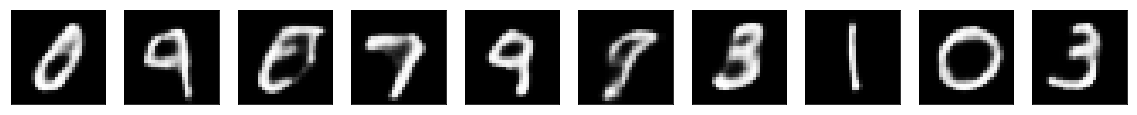

8000 [D loss: 0.664569, acc.: 60.94%] [G loss: 0.921054]
8001 [D loss: 0.661676, acc.: 60.94%] [G loss: 0.977649]
8002 [D loss: 0.671983, acc.: 57.03%] [G loss: 0.886057]
8003 [D loss: 0.645250, acc.: 64.06%] [G loss: 0.836895]
8004 [D loss: 0.632123, acc.: 67.97%] [G loss: 0.871166]
8005 [D loss: 0.655946, acc.: 58.59%] [G loss: 0.874591]
8006 [D loss: 0.640014, acc.: 61.72%] [G loss: 0.847056]
8007 [D loss: 0.642072, acc.: 62.50%] [G loss: 0.850435]
8008 [D loss: 0.615625, acc.: 67.19%] [G loss: 0.836680]
8009 [D loss: 0.653161, acc.: 63.28%] [G loss: 0.847096]
8010 [D loss: 0.672660, acc.: 51.56%] [G loss: 0.863296]
8011 [D loss: 0.636117, acc.: 64.84%] [G loss: 0.864919]
8012 [D loss: 0.635709, acc.: 64.06%] [G loss: 0.852421]
8013 [D loss: 0.653142, acc.: 57.03%] [G loss: 0.863880]
8014 [D loss: 0.619711, acc.: 65.62%] [G loss: 0.888061]
8015 [D loss: 0.642730, acc.: 61.72%] [G loss: 0.831367]
8016 [D loss: 0.621252, acc.: 65.62%] [G loss: 0.812152]
8017 [D loss: 0.621361, acc.: 6

8145 [D loss: 0.636761, acc.: 64.06%] [G loss: 0.838809]
8146 [D loss: 0.639732, acc.: 65.62%] [G loss: 0.885359]
8147 [D loss: 0.629078, acc.: 64.84%] [G loss: 0.885423]
8148 [D loss: 0.643285, acc.: 61.72%] [G loss: 0.899662]
8149 [D loss: 0.612054, acc.: 66.41%] [G loss: 0.889345]
8150 [D loss: 0.592188, acc.: 70.31%] [G loss: 0.864271]
8151 [D loss: 0.638755, acc.: 64.84%] [G loss: 0.880640]
8152 [D loss: 0.642714, acc.: 67.97%] [G loss: 0.885119]
8153 [D loss: 0.654277, acc.: 62.50%] [G loss: 0.933227]
8154 [D loss: 0.637382, acc.: 62.50%] [G loss: 0.979064]
8155 [D loss: 0.665607, acc.: 60.94%] [G loss: 0.888959]
8156 [D loss: 0.643715, acc.: 66.41%] [G loss: 0.847121]
8157 [D loss: 0.615021, acc.: 63.28%] [G loss: 0.847206]
8158 [D loss: 0.658867, acc.: 57.03%] [G loss: 0.854039]
8159 [D loss: 0.622625, acc.: 67.97%] [G loss: 0.848841]
8160 [D loss: 0.633317, acc.: 65.62%] [G loss: 0.846747]
8161 [D loss: 0.610774, acc.: 67.97%] [G loss: 0.845738]
8162 [D loss: 0.671000, acc.: 6

8293 [D loss: 0.630849, acc.: 64.84%] [G loss: 0.939726]
8294 [D loss: 0.659603, acc.: 61.72%] [G loss: 0.855955]
8295 [D loss: 0.658196, acc.: 58.59%] [G loss: 0.822996]
8296 [D loss: 0.626513, acc.: 64.84%] [G loss: 0.859767]
8297 [D loss: 0.628692, acc.: 64.06%] [G loss: 0.841002]
8298 [D loss: 0.626245, acc.: 63.28%] [G loss: 0.873631]
8299 [D loss: 0.638007, acc.: 57.81%] [G loss: 0.871833]
8300 [D loss: 0.631511, acc.: 66.41%] [G loss: 0.880041]
8301 [D loss: 0.595637, acc.: 71.88%] [G loss: 0.849876]
8302 [D loss: 0.626498, acc.: 60.94%] [G loss: 0.869498]
8303 [D loss: 0.684233, acc.: 57.03%] [G loss: 0.862065]
8304 [D loss: 0.633494, acc.: 64.06%] [G loss: 0.899529]
8305 [D loss: 0.605091, acc.: 68.75%] [G loss: 0.857986]
8306 [D loss: 0.632123, acc.: 65.62%] [G loss: 0.883031]
8307 [D loss: 0.616541, acc.: 67.19%] [G loss: 0.889535]
8308 [D loss: 0.661195, acc.: 62.50%] [G loss: 0.873507]
8309 [D loss: 0.644931, acc.: 64.84%] [G loss: 0.892151]
8310 [D loss: 0.631522, acc.: 6

8440 [D loss: 0.621572, acc.: 66.41%] [G loss: 0.808453]
8441 [D loss: 0.644257, acc.: 61.72%] [G loss: 0.856295]
8442 [D loss: 0.645429, acc.: 63.28%] [G loss: 0.856264]
8443 [D loss: 0.672250, acc.: 54.69%] [G loss: 0.826372]
8444 [D loss: 0.648070, acc.: 62.50%] [G loss: 0.840058]
8445 [D loss: 0.630733, acc.: 63.28%] [G loss: 0.823011]
8446 [D loss: 0.671357, acc.: 51.56%] [G loss: 0.887443]
8447 [D loss: 0.622631, acc.: 65.62%] [G loss: 0.871212]
8448 [D loss: 0.613196, acc.: 67.97%] [G loss: 0.891136]
8449 [D loss: 0.572237, acc.: 75.78%] [G loss: 0.921967]
8450 [D loss: 0.616617, acc.: 61.72%] [G loss: 0.899276]
8451 [D loss: 0.630401, acc.: 61.72%] [G loss: 0.845059]
8452 [D loss: 0.636438, acc.: 64.06%] [G loss: 0.875810]
8453 [D loss: 0.660080, acc.: 60.16%] [G loss: 0.862485]
8454 [D loss: 0.619161, acc.: 58.59%] [G loss: 0.835328]
8455 [D loss: 0.642588, acc.: 60.16%] [G loss: 0.857636]
8456 [D loss: 0.623044, acc.: 60.94%] [G loss: 0.863841]
8457 [D loss: 0.630249, acc.: 6

8590 [D loss: 0.631426, acc.: 66.41%] [G loss: 0.882493]
8591 [D loss: 0.674153, acc.: 60.94%] [G loss: 0.876598]
8592 [D loss: 0.664150, acc.: 57.03%] [G loss: 0.832908]
8593 [D loss: 0.639957, acc.: 60.94%] [G loss: 0.831371]
8594 [D loss: 0.668308, acc.: 53.12%] [G loss: 0.861248]
8595 [D loss: 0.658949, acc.: 60.16%] [G loss: 0.879454]
8596 [D loss: 0.609927, acc.: 67.19%] [G loss: 0.866546]
8597 [D loss: 0.639164, acc.: 61.72%] [G loss: 0.881100]
8598 [D loss: 0.620369, acc.: 62.50%] [G loss: 0.872344]
8599 [D loss: 0.635311, acc.: 61.72%] [G loss: 0.856260]
8600 [D loss: 0.626612, acc.: 64.06%] [G loss: 0.844484]
8601 [D loss: 0.654832, acc.: 59.38%] [G loss: 0.855828]
8602 [D loss: 0.672767, acc.: 58.59%] [G loss: 0.850824]
8603 [D loss: 0.623474, acc.: 70.31%] [G loss: 0.842404]
8604 [D loss: 0.654697, acc.: 62.50%] [G loss: 0.879483]
8605 [D loss: 0.617514, acc.: 64.06%] [G loss: 0.864728]
8606 [D loss: 0.636648, acc.: 60.94%] [G loss: 0.882845]
8607 [D loss: 0.601736, acc.: 6

8740 [D loss: 0.643045, acc.: 60.16%] [G loss: 0.852232]
8741 [D loss: 0.621595, acc.: 64.84%] [G loss: 0.889863]
8742 [D loss: 0.641293, acc.: 64.84%] [G loss: 0.844912]
8743 [D loss: 0.652488, acc.: 64.06%] [G loss: 0.868523]
8744 [D loss: 0.621622, acc.: 65.62%] [G loss: 0.843774]
8745 [D loss: 0.669652, acc.: 56.25%] [G loss: 0.838806]
8746 [D loss: 0.625171, acc.: 68.75%] [G loss: 0.861975]
8747 [D loss: 0.640691, acc.: 63.28%] [G loss: 0.828183]
8748 [D loss: 0.631829, acc.: 63.28%] [G loss: 0.832458]
8749 [D loss: 0.596549, acc.: 72.66%] [G loss: 0.832624]
8750 [D loss: 0.654548, acc.: 61.72%] [G loss: 0.842873]
8751 [D loss: 0.618807, acc.: 64.06%] [G loss: 0.828357]
8752 [D loss: 0.665928, acc.: 59.38%] [G loss: 0.841972]
8753 [D loss: 0.640074, acc.: 58.59%] [G loss: 0.835629]
8754 [D loss: 0.645465, acc.: 63.28%] [G loss: 0.825838]
8755 [D loss: 0.623242, acc.: 66.41%] [G loss: 0.857465]
8756 [D loss: 0.661846, acc.: 58.59%] [G loss: 0.891162]
8757 [D loss: 0.616350, acc.: 7

8889 [D loss: 0.621298, acc.: 67.19%] [G loss: 0.867924]
8890 [D loss: 0.654697, acc.: 63.28%] [G loss: 0.859776]
8891 [D loss: 0.634375, acc.: 60.16%] [G loss: 0.891062]
8892 [D loss: 0.653013, acc.: 60.16%] [G loss: 0.851484]
8893 [D loss: 0.656957, acc.: 62.50%] [G loss: 0.863388]
8894 [D loss: 0.609151, acc.: 64.84%] [G loss: 0.855038]
8895 [D loss: 0.622248, acc.: 66.41%] [G loss: 0.862759]
8896 [D loss: 0.648727, acc.: 59.38%] [G loss: 0.888178]
8897 [D loss: 0.617466, acc.: 68.75%] [G loss: 0.860790]
8898 [D loss: 0.607818, acc.: 69.53%] [G loss: 0.866770]
8899 [D loss: 0.685976, acc.: 64.84%] [G loss: 0.868842]
8900 [D loss: 0.622021, acc.: 69.53%] [G loss: 0.908830]
8901 [D loss: 0.623562, acc.: 62.50%] [G loss: 0.888711]
8902 [D loss: 0.634160, acc.: 62.50%] [G loss: 0.890245]
8903 [D loss: 0.666934, acc.: 60.94%] [G loss: 0.894667]
8904 [D loss: 0.647604, acc.: 55.47%] [G loss: 0.902062]
8905 [D loss: 0.618814, acc.: 63.28%] [G loss: 0.832977]
8906 [D loss: 0.638371, acc.: 6

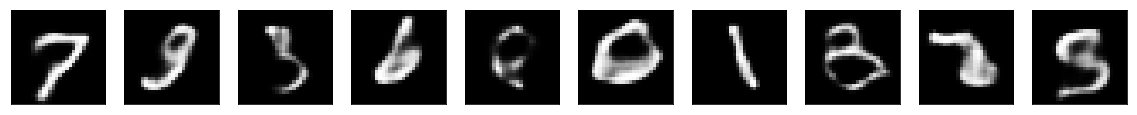

9000 [D loss: 0.645388, acc.: 60.94%] [G loss: 0.905796]
9001 [D loss: 0.676261, acc.: 61.72%] [G loss: 0.907964]
9002 [D loss: 0.627963, acc.: 64.84%] [G loss: 0.911381]
9003 [D loss: 0.640814, acc.: 60.16%] [G loss: 0.864999]
9004 [D loss: 0.625952, acc.: 66.41%] [G loss: 0.852710]
9005 [D loss: 0.639415, acc.: 68.75%] [G loss: 0.859269]
9006 [D loss: 0.613663, acc.: 62.50%] [G loss: 0.872352]
9007 [D loss: 0.621929, acc.: 68.75%] [G loss: 0.859846]
9008 [D loss: 0.644650, acc.: 62.50%] [G loss: 0.883691]
9009 [D loss: 0.618526, acc.: 64.84%] [G loss: 0.879608]
9010 [D loss: 0.639397, acc.: 67.97%] [G loss: 0.850997]
9011 [D loss: 0.633542, acc.: 71.88%] [G loss: 0.852161]
9012 [D loss: 0.625698, acc.: 64.06%] [G loss: 0.870479]
9013 [D loss: 0.595701, acc.: 64.06%] [G loss: 0.860768]
9014 [D loss: 0.637338, acc.: 62.50%] [G loss: 0.867923]
9015 [D loss: 0.641888, acc.: 60.94%] [G loss: 0.921606]
9016 [D loss: 0.639071, acc.: 60.94%] [G loss: 0.895139]
9017 [D loss: 0.625365, acc.: 6

9147 [D loss: 0.640773, acc.: 58.59%] [G loss: 0.883095]
9148 [D loss: 0.624041, acc.: 62.50%] [G loss: 0.887246]
9149 [D loss: 0.644777, acc.: 62.50%] [G loss: 0.895254]
9150 [D loss: 0.662912, acc.: 62.50%] [G loss: 0.899087]
9151 [D loss: 0.662787, acc.: 57.81%] [G loss: 0.871586]
9152 [D loss: 0.639621, acc.: 64.84%] [G loss: 0.871579]
9153 [D loss: 0.668193, acc.: 55.47%] [G loss: 0.855482]
9154 [D loss: 0.675015, acc.: 56.25%] [G loss: 0.888337]
9155 [D loss: 0.646494, acc.: 62.50%] [G loss: 0.835687]
9156 [D loss: 0.603839, acc.: 69.53%] [G loss: 0.868000]
9157 [D loss: 0.640347, acc.: 62.50%] [G loss: 0.868054]
9158 [D loss: 0.600375, acc.: 67.19%] [G loss: 0.870346]
9159 [D loss: 0.620068, acc.: 64.84%] [G loss: 0.832909]
9160 [D loss: 0.620665, acc.: 64.84%] [G loss: 0.851693]
9161 [D loss: 0.645811, acc.: 62.50%] [G loss: 0.871570]
9162 [D loss: 0.599522, acc.: 66.41%] [G loss: 0.872435]
9163 [D loss: 0.646190, acc.: 61.72%] [G loss: 0.861804]
9164 [D loss: 0.628642, acc.: 5

9298 [D loss: 0.674782, acc.: 60.16%] [G loss: 0.854345]
9299 [D loss: 0.658699, acc.: 61.72%] [G loss: 0.903096]
9300 [D loss: 0.650394, acc.: 60.94%] [G loss: 0.918950]
9301 [D loss: 0.626341, acc.: 61.72%] [G loss: 0.941760]
9302 [D loss: 0.665278, acc.: 57.03%] [G loss: 0.863589]
9303 [D loss: 0.663710, acc.: 59.38%] [G loss: 0.892487]
9304 [D loss: 0.670901, acc.: 64.84%] [G loss: 0.878826]
9305 [D loss: 0.608192, acc.: 68.75%] [G loss: 0.862160]
9306 [D loss: 0.652099, acc.: 62.50%] [G loss: 0.912057]
9307 [D loss: 0.673307, acc.: 58.59%] [G loss: 0.870316]
9308 [D loss: 0.669149, acc.: 57.03%] [G loss: 0.919076]
9309 [D loss: 0.659403, acc.: 59.38%] [G loss: 0.876501]
9310 [D loss: 0.634078, acc.: 65.62%] [G loss: 0.899177]
9311 [D loss: 0.620812, acc.: 64.84%] [G loss: 0.875315]
9312 [D loss: 0.633399, acc.: 67.97%] [G loss: 0.873505]
9313 [D loss: 0.610253, acc.: 66.41%] [G loss: 0.890388]
9314 [D loss: 0.640035, acc.: 64.84%] [G loss: 0.873368]
9315 [D loss: 0.624713, acc.: 6

9447 [D loss: 0.583265, acc.: 73.44%] [G loss: 0.857438]
9448 [D loss: 0.657239, acc.: 58.59%] [G loss: 0.868075]
9449 [D loss: 0.636691, acc.: 62.50%] [G loss: 0.870012]
9450 [D loss: 0.697093, acc.: 50.78%] [G loss: 0.851967]
9451 [D loss: 0.627389, acc.: 64.84%] [G loss: 0.848306]
9452 [D loss: 0.618785, acc.: 72.66%] [G loss: 0.887537]
9453 [D loss: 0.646408, acc.: 57.03%] [G loss: 0.882962]
9454 [D loss: 0.656571, acc.: 56.25%] [G loss: 0.875996]
9455 [D loss: 0.634395, acc.: 61.72%] [G loss: 0.877339]
9456 [D loss: 0.637236, acc.: 59.38%] [G loss: 0.863884]
9457 [D loss: 0.680739, acc.: 57.03%] [G loss: 0.916641]
9458 [D loss: 0.629178, acc.: 57.81%] [G loss: 0.914362]
9459 [D loss: 0.626790, acc.: 64.06%] [G loss: 0.856070]
9460 [D loss: 0.655938, acc.: 56.25%] [G loss: 0.888390]
9461 [D loss: 0.616213, acc.: 64.06%] [G loss: 0.900273]
9462 [D loss: 0.661420, acc.: 59.38%] [G loss: 0.881749]
9463 [D loss: 0.634755, acc.: 67.19%] [G loss: 0.883718]
9464 [D loss: 0.634632, acc.: 6

9593 [D loss: 0.671363, acc.: 60.16%] [G loss: 0.854662]
9594 [D loss: 0.692236, acc.: 52.34%] [G loss: 0.843453]
9595 [D loss: 0.615869, acc.: 66.41%] [G loss: 0.854036]
9596 [D loss: 0.641177, acc.: 64.06%] [G loss: 0.822049]
9597 [D loss: 0.619506, acc.: 64.84%] [G loss: 0.857633]
9598 [D loss: 0.672007, acc.: 60.16%] [G loss: 0.877113]
9599 [D loss: 0.623352, acc.: 67.97%] [G loss: 0.869489]
9600 [D loss: 0.655288, acc.: 64.84%] [G loss: 0.844166]
9601 [D loss: 0.661290, acc.: 65.62%] [G loss: 0.887632]
9602 [D loss: 0.647013, acc.: 60.16%] [G loss: 0.903678]
9603 [D loss: 0.674957, acc.: 57.03%] [G loss: 0.856939]
9604 [D loss: 0.646178, acc.: 60.16%] [G loss: 0.877022]
9605 [D loss: 0.643967, acc.: 64.06%] [G loss: 0.900827]
9606 [D loss: 0.619051, acc.: 67.97%] [G loss: 0.922685]
9607 [D loss: 0.639881, acc.: 62.50%] [G loss: 0.896613]
9608 [D loss: 0.644754, acc.: 64.84%] [G loss: 0.864789]
9609 [D loss: 0.662043, acc.: 64.84%] [G loss: 0.882272]
9610 [D loss: 0.605102, acc.: 6

9742 [D loss: 0.658210, acc.: 66.41%] [G loss: 0.869479]
9743 [D loss: 0.651759, acc.: 64.06%] [G loss: 0.913356]
9744 [D loss: 0.639785, acc.: 64.06%] [G loss: 0.870952]
9745 [D loss: 0.662964, acc.: 56.25%] [G loss: 0.918295]
9746 [D loss: 0.670146, acc.: 55.47%] [G loss: 0.867954]
9747 [D loss: 0.616996, acc.: 70.31%] [G loss: 0.867479]
9748 [D loss: 0.651785, acc.: 68.75%] [G loss: 0.862852]
9749 [D loss: 0.651419, acc.: 59.38%] [G loss: 0.883268]
9750 [D loss: 0.646237, acc.: 66.41%] [G loss: 0.858723]
9751 [D loss: 0.669925, acc.: 56.25%] [G loss: 0.863833]
9752 [D loss: 0.646455, acc.: 59.38%] [G loss: 0.856369]
9753 [D loss: 0.648709, acc.: 56.25%] [G loss: 0.879394]
9754 [D loss: 0.650003, acc.: 60.94%] [G loss: 0.835789]
9755 [D loss: 0.612180, acc.: 70.31%] [G loss: 0.922069]
9756 [D loss: 0.599093, acc.: 69.53%] [G loss: 0.855291]
9757 [D loss: 0.615203, acc.: 67.97%] [G loss: 0.887855]
9758 [D loss: 0.625592, acc.: 67.19%] [G loss: 0.862996]
9759 [D loss: 0.621084, acc.: 6

9888 [D loss: 0.644979, acc.: 61.72%] [G loss: 0.918985]
9889 [D loss: 0.661763, acc.: 59.38%] [G loss: 0.895518]
9890 [D loss: 0.672920, acc.: 55.47%] [G loss: 0.891280]
9891 [D loss: 0.663994, acc.: 58.59%] [G loss: 0.870622]
9892 [D loss: 0.644152, acc.: 63.28%] [G loss: 0.912450]
9893 [D loss: 0.681181, acc.: 60.16%] [G loss: 0.843865]
9894 [D loss: 0.661695, acc.: 58.59%] [G loss: 0.849224]
9895 [D loss: 0.640965, acc.: 67.19%] [G loss: 0.862000]
9896 [D loss: 0.644479, acc.: 71.88%] [G loss: 0.867389]
9897 [D loss: 0.654205, acc.: 61.72%] [G loss: 0.828203]
9898 [D loss: 0.634913, acc.: 66.41%] [G loss: 0.868051]
9899 [D loss: 0.662356, acc.: 59.38%] [G loss: 0.854244]
9900 [D loss: 0.665886, acc.: 63.28%] [G loss: 0.864312]
9901 [D loss: 0.652803, acc.: 58.59%] [G loss: 0.840778]
9902 [D loss: 0.625406, acc.: 65.62%] [G loss: 0.885227]
9903 [D loss: 0.652106, acc.: 56.25%] [G loss: 0.874565]
9904 [D loss: 0.651768, acc.: 63.28%] [G loss: 0.896492]
9905 [D loss: 0.635558, acc.: 6

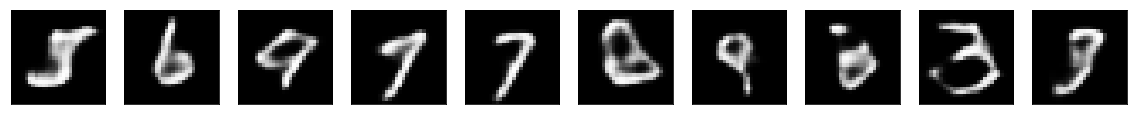

10000 [D loss: 0.638591, acc.: 63.28%] [G loss: 0.881823]
10001 [D loss: 0.679540, acc.: 57.81%] [G loss: 0.891023]
10002 [D loss: 0.605937, acc.: 71.88%] [G loss: 0.901116]
10003 [D loss: 0.648885, acc.: 65.62%] [G loss: 0.851980]
10004 [D loss: 0.642933, acc.: 58.59%] [G loss: 0.862689]
10005 [D loss: 0.629067, acc.: 65.62%] [G loss: 0.861611]
10006 [D loss: 0.615222, acc.: 71.09%] [G loss: 0.880083]
10007 [D loss: 0.668411, acc.: 54.69%] [G loss: 0.894113]
10008 [D loss: 0.591251, acc.: 64.06%] [G loss: 0.913575]
10009 [D loss: 0.601275, acc.: 71.88%] [G loss: 0.839974]
10010 [D loss: 0.694169, acc.: 63.28%] [G loss: 0.857792]
10011 [D loss: 0.667104, acc.: 59.38%] [G loss: 0.890493]
10012 [D loss: 0.628790, acc.: 63.28%] [G loss: 0.883400]
10013 [D loss: 0.628994, acc.: 64.06%] [G loss: 0.852927]
10014 [D loss: 0.641813, acc.: 60.16%] [G loss: 0.853915]
10015 [D loss: 0.613576, acc.: 64.84%] [G loss: 0.846856]
10016 [D loss: 0.635760, acc.: 64.84%] [G loss: 0.857749]
10017 [D loss:

10146 [D loss: 0.652267, acc.: 59.38%] [G loss: 0.895357]
10147 [D loss: 0.640137, acc.: 63.28%] [G loss: 0.887188]
10148 [D loss: 0.666357, acc.: 57.03%] [G loss: 0.881837]
10149 [D loss: 0.652764, acc.: 59.38%] [G loss: 0.918690]
10150 [D loss: 0.654521, acc.: 62.50%] [G loss: 0.861408]
10151 [D loss: 0.631183, acc.: 59.38%] [G loss: 0.895535]
10152 [D loss: 0.628623, acc.: 63.28%] [G loss: 0.850768]
10153 [D loss: 0.640651, acc.: 60.94%] [G loss: 0.902497]
10154 [D loss: 0.615114, acc.: 68.75%] [G loss: 0.869137]
10155 [D loss: 0.608239, acc.: 67.19%] [G loss: 0.859614]
10156 [D loss: 0.670048, acc.: 57.81%] [G loss: 0.863133]
10157 [D loss: 0.637074, acc.: 63.28%] [G loss: 0.872177]
10158 [D loss: 0.635631, acc.: 63.28%] [G loss: 0.829437]
10159 [D loss: 0.650576, acc.: 65.62%] [G loss: 0.854103]
10160 [D loss: 0.651010, acc.: 62.50%] [G loss: 0.900690]
10161 [D loss: 0.636742, acc.: 65.62%] [G loss: 0.844571]
10162 [D loss: 0.653006, acc.: 60.16%] [G loss: 0.875860]
10163 [D loss:

10288 [D loss: 0.633288, acc.: 58.59%] [G loss: 0.915567]
10289 [D loss: 0.630406, acc.: 67.19%] [G loss: 0.912611]
10290 [D loss: 0.627257, acc.: 60.94%] [G loss: 0.863345]
10291 [D loss: 0.653123, acc.: 56.25%] [G loss: 0.850335]
10292 [D loss: 0.618835, acc.: 68.75%] [G loss: 0.882800]
10293 [D loss: 0.617839, acc.: 67.19%] [G loss: 0.830810]
10294 [D loss: 0.625954, acc.: 64.06%] [G loss: 0.873574]
10295 [D loss: 0.668276, acc.: 64.06%] [G loss: 0.833986]
10296 [D loss: 0.647853, acc.: 62.50%] [G loss: 0.863576]
10297 [D loss: 0.636826, acc.: 64.06%] [G loss: 0.910318]
10298 [D loss: 0.673663, acc.: 61.72%] [G loss: 0.892057]
10299 [D loss: 0.620862, acc.: 65.62%] [G loss: 0.871633]
10300 [D loss: 0.631991, acc.: 63.28%] [G loss: 0.870118]
10301 [D loss: 0.634846, acc.: 59.38%] [G loss: 0.921171]
10302 [D loss: 0.633029, acc.: 60.94%] [G loss: 0.891157]
10303 [D loss: 0.666345, acc.: 57.03%] [G loss: 0.910457]
10304 [D loss: 0.622818, acc.: 67.19%] [G loss: 0.856753]
10305 [D loss:

10435 [D loss: 0.604729, acc.: 67.19%] [G loss: 0.882705]
10436 [D loss: 0.650154, acc.: 63.28%] [G loss: 0.860594]
10437 [D loss: 0.599611, acc.: 74.22%] [G loss: 0.827808]
10438 [D loss: 0.637009, acc.: 67.97%] [G loss: 0.889185]
10439 [D loss: 0.606717, acc.: 68.75%] [G loss: 0.879485]
10440 [D loss: 0.652687, acc.: 57.03%] [G loss: 0.867316]
10441 [D loss: 0.665130, acc.: 55.47%] [G loss: 0.873601]
10442 [D loss: 0.645790, acc.: 54.69%] [G loss: 0.889017]
10443 [D loss: 0.632374, acc.: 60.94%] [G loss: 0.869240]
10444 [D loss: 0.621173, acc.: 69.53%] [G loss: 0.869475]
10445 [D loss: 0.641259, acc.: 61.72%] [G loss: 0.903201]
10446 [D loss: 0.632508, acc.: 66.41%] [G loss: 0.868167]
10447 [D loss: 0.674735, acc.: 59.38%] [G loss: 0.984246]
10448 [D loss: 0.662583, acc.: 58.59%] [G loss: 0.893852]
10449 [D loss: 0.624010, acc.: 65.62%] [G loss: 0.837939]
10450 [D loss: 0.623399, acc.: 71.88%] [G loss: 0.850986]
10451 [D loss: 0.621785, acc.: 67.97%] [G loss: 0.834453]
10452 [D loss:

10578 [D loss: 0.602469, acc.: 67.19%] [G loss: 0.896834]
10579 [D loss: 0.582142, acc.: 75.78%] [G loss: 0.871467]
10580 [D loss: 0.649133, acc.: 61.72%] [G loss: 0.873858]
10581 [D loss: 0.614076, acc.: 66.41%] [G loss: 0.889906]
10582 [D loss: 0.612971, acc.: 64.06%] [G loss: 0.865798]
10583 [D loss: 0.678276, acc.: 58.59%] [G loss: 0.880489]
10584 [D loss: 0.633376, acc.: 65.62%] [G loss: 0.857731]
10585 [D loss: 0.671376, acc.: 57.81%] [G loss: 0.873231]
10586 [D loss: 0.664622, acc.: 57.03%] [G loss: 0.896444]
10587 [D loss: 0.651493, acc.: 63.28%] [G loss: 0.923970]
10588 [D loss: 0.641293, acc.: 61.72%] [G loss: 0.905938]
10589 [D loss: 0.620546, acc.: 65.62%] [G loss: 0.845337]
10590 [D loss: 0.651170, acc.: 63.28%] [G loss: 0.890573]
10591 [D loss: 0.661129, acc.: 61.72%] [G loss: 0.880322]
10592 [D loss: 0.639199, acc.: 60.16%] [G loss: 0.868354]
10593 [D loss: 0.640064, acc.: 56.25%] [G loss: 0.878016]
10594 [D loss: 0.640194, acc.: 60.94%] [G loss: 0.875594]
10595 [D loss:

10721 [D loss: 0.632741, acc.: 65.62%] [G loss: 0.850102]
10722 [D loss: 0.625888, acc.: 65.62%] [G loss: 0.874535]
10723 [D loss: 0.673073, acc.: 56.25%] [G loss: 0.821172]
10724 [D loss: 0.665962, acc.: 60.16%] [G loss: 0.866140]
10725 [D loss: 0.654233, acc.: 59.38%] [G loss: 0.892474]
10726 [D loss: 0.702264, acc.: 57.81%] [G loss: 0.890548]
10727 [D loss: 0.652594, acc.: 58.59%] [G loss: 0.887287]
10728 [D loss: 0.650937, acc.: 64.84%] [G loss: 0.883966]
10729 [D loss: 0.662165, acc.: 60.94%] [G loss: 0.879752]
10730 [D loss: 0.648998, acc.: 58.59%] [G loss: 0.912205]
10731 [D loss: 0.656417, acc.: 57.81%] [G loss: 0.873118]
10732 [D loss: 0.641480, acc.: 59.38%] [G loss: 0.887527]
10733 [D loss: 0.628588, acc.: 62.50%] [G loss: 0.874120]
10734 [D loss: 0.613844, acc.: 66.41%] [G loss: 0.877678]
10735 [D loss: 0.668059, acc.: 59.38%] [G loss: 0.883680]
10736 [D loss: 0.670953, acc.: 54.69%] [G loss: 0.868295]
10737 [D loss: 0.642921, acc.: 61.72%] [G loss: 0.862398]
10738 [D loss:

10865 [D loss: 0.629298, acc.: 66.41%] [G loss: 0.841063]
10866 [D loss: 0.629932, acc.: 60.94%] [G loss: 0.850671]
10867 [D loss: 0.641141, acc.: 60.94%] [G loss: 0.877718]
10868 [D loss: 0.627861, acc.: 61.72%] [G loss: 0.870851]
10869 [D loss: 0.633471, acc.: 64.06%] [G loss: 0.858882]
10870 [D loss: 0.629764, acc.: 63.28%] [G loss: 0.889895]
10871 [D loss: 0.612967, acc.: 64.84%] [G loss: 0.857517]
10872 [D loss: 0.633877, acc.: 63.28%] [G loss: 0.874754]
10873 [D loss: 0.633790, acc.: 65.62%] [G loss: 0.867166]
10874 [D loss: 0.669938, acc.: 60.94%] [G loss: 0.887283]
10875 [D loss: 0.652534, acc.: 61.72%] [G loss: 0.859622]
10876 [D loss: 0.644290, acc.: 64.06%] [G loss: 0.860264]
10877 [D loss: 0.673223, acc.: 53.12%] [G loss: 0.856247]
10878 [D loss: 0.643331, acc.: 64.06%] [G loss: 0.897406]
10879 [D loss: 0.642189, acc.: 61.72%] [G loss: 0.863087]
10880 [D loss: 0.665544, acc.: 53.91%] [G loss: 0.871820]
10881 [D loss: 0.632060, acc.: 66.41%] [G loss: 0.867130]
10882 [D loss:

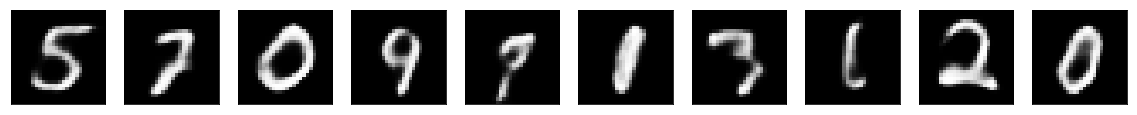

11000 [D loss: 0.619401, acc.: 64.06%] [G loss: 0.909099]
11001 [D loss: 0.643184, acc.: 60.94%] [G loss: 0.887587]
11002 [D loss: 0.642475, acc.: 65.62%] [G loss: 0.863474]
11003 [D loss: 0.607434, acc.: 65.62%] [G loss: 0.836748]
11004 [D loss: 0.630031, acc.: 62.50%] [G loss: 0.832617]
11005 [D loss: 0.630233, acc.: 58.59%] [G loss: 0.901291]
11006 [D loss: 0.634046, acc.: 62.50%] [G loss: 0.885490]
11007 [D loss: 0.690850, acc.: 58.59%] [G loss: 0.880033]
11008 [D loss: 0.663994, acc.: 63.28%] [G loss: 0.907364]
11009 [D loss: 0.673497, acc.: 58.59%] [G loss: 0.857827]
11010 [D loss: 0.619902, acc.: 64.06%] [G loss: 0.912929]
11011 [D loss: 0.631436, acc.: 64.06%] [G loss: 0.859020]
11012 [D loss: 0.615143, acc.: 64.06%] [G loss: 0.874155]
11013 [D loss: 0.635607, acc.: 61.72%] [G loss: 0.827599]
11014 [D loss: 0.646028, acc.: 63.28%] [G loss: 0.891435]
11015 [D loss: 0.634793, acc.: 62.50%] [G loss: 0.905279]
11016 [D loss: 0.624621, acc.: 64.84%] [G loss: 0.905773]
11017 [D loss:

In [ ]:
import matplotlib.pyplot as plt

discriminator_input_dim = (64,)
generator_input_dim = (100,)
batch_size = 128
epochs = 50000

discriminator_input = Input(shape=discriminator_input_dim)
generator_input = Input(shape=generator_input_dim)
input_double = Input(shape=generator_input_dim)

def custom_activation(x):
    return (K.sigmoid(x) * 3) 

def discriminator(x):
    hidden1 = Dense(256, activation="relu")(x)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(1, activation="sigmoid")(hidden2)
    
def generator(x):
    hidden1 = Dense(256, activation="relu")(x)
    hidden2 = Dense(256, activation="relu")(hidden1)
    return Dense(64, activation=custom_activation)(hidden2)

generator_model = Model(generator_input, generator(generator_input))
discriminator_model = Model(discriminator_input, discriminator(discriminator_input))
discriminator_model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])
generator_model.compile(loss='binary_crossentropy', optimizer="adadelta")

img = generator_model(input_double)
discriminator_model.trainable = False
valid = discriminator_model(img)

double_model = Model(input_double, valid)
double_model.compile(loss='binary_crossentropy', optimizer="adadelta")

X_train = data_x.reshape(60000, 64)
half_batch = int(batch_size / 2)
for epoch in range(epochs):  
    if epoch % 1000 == 0:
        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(decoder.predict(generator_model.predict(np.random.normal(0, 1, (1, 100))).reshape((1,4,4,4))).reshape(28, 28))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            plt.gray()
        plt.show()
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator_model.predict(noise)

    d_loss_real = discriminator_model.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator_model.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = double_model.train_on_batch(noise, np.ones((batch_size, 1)))

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))